In [1]:
from __init__ import DATASET_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV




import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
gmean_scorer = make_scorer(geometric_mean_score)



from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import validate_model_classification_smote, hyperparameter_tuning_clasification_smote,  hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  elevated DHT  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  \
810                                                         2                       NaN   29.79                       NaN    54.5        169.0  19.081965                              114.0                                   65.0           0.0                      67.0    0.0                    81.0               0.827160             0.0              1.0                   0.396450       0.0                                                       0.0                              1.0                           0.0                                             0.0                                              0.0   0.0        0.0                                                         0.0               1.0           0.0             0.0                              5.453                             4.879          10.332                                  0.0                  1.0                     7.12                      10.52                   17.64             0.0          3.80   
777                                                         2                     231.0   18.58                  0.780000    80.0        164.0  29.744200                              121.0                                   69.0           0.0                      71.0    0.0                    78.0               0.910256             1.0              1.0                   0.432927       0.0                                                       1.0                              1.0                           1.0                                             0.0                                              1.0   0.0        0.0                                                         7.0               0.0           0.0             1.0                              4.144                             3.420           7.564                                  0.0                  1.0                     2.62                       5.46                    8.08             0.0          6.28   
428                                                         1                     271.0  100.70                  5.235294    70.0        162.0  26.672763                              124.0                                   86.0           0.0                      81.0    0.0                    85.0               0.952941             1.0              1.0                   0.500000       1.0                                                       1.0                              1.0                           0.0                                             1.0                                              1.0   1.0        1.0                                                         8.0               1.0           1.0             1.0                              5.040                             3.458           8.498                                  0.0                  0.0                    11.24                      10.37                   21.61             0.0          9.21   
135                                                      

In [3]:
df.loc[(df[PCO] != 1) & (df[PCO] != 4), PCO] = np.nan

#  change all 4s to 0s for the need of the visualisation algorithm

#  0 = High Andro, 1 = PCOS
df[PCO] = np.where(df[PCO] == 4, 0, df[PCO])

CLASS_NAMES = ['High Andro', 'PCOS']

In [4]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

(595, 135)


<Axes: >

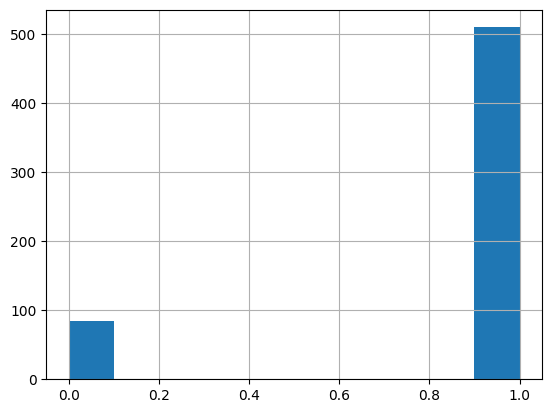

In [5]:
print(df_cleaned.shape)
df_cleaned[PCO].hist()

## Best preprocessing

### For SMOTE

In [6]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [7]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [75]:
#  SMOTE
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4],
    'model__min_samples_split': [10],
    'model__min_samples_leaf': [10],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_clasification_smote(X_train, y_train, PCO, model_tree, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, param_grid_tree, scoring_metric=gmean_scorer)

# tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.6602208436178579


params  mean_train_score  mean_test_score
1      {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.798116         0.660221
2   {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.761178         0.642397
0      {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.756529         0.640297
5  {'model__class_weight': None, 'model__criterion': 'log_loss', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.798234         0.639912
4  {'model__class_weight': None, 'model__criterion': 'log_loss', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.761178         0.637882
3   {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.796502         0.636806

In [76]:
#  NO SMOTE

model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4],
    'model__min_samples_split': [7, 10],
    'model__min_samples_leaf': [7, 10],
    'model__class_weight': [None, 'balanced'],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric=gmean_scorer)

# tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 48 candidates, totalling 720 fits


Best parameters: {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.6817026238075835


params  mean_train_score  mean_test_score
27      {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.820214         0.681703
47  {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.834327         0.681265
38    {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.834327         0.681265
26       {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.820214         0.680886
39   {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.834327         0.680058
46   {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.834327         0.679722
25       {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.820596         0.679605
24        {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.820596         0.679605
30       {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.867193         0.678711
31      {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.867193         0.678711
45   {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.836336         0.672787
44    {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.836336         0.672224
36     {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.836336         0.671868
37    {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.836336         0.671157
29       {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.872372         0.666547
28        {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.872372         0.663470
35   {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.771477         0.662482
42   {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.771477         0.661510
34    {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.771477         0.661510
43  {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.771477         0.660988
33    {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 3, 'm

In [ ]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 10}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.6602161578656739


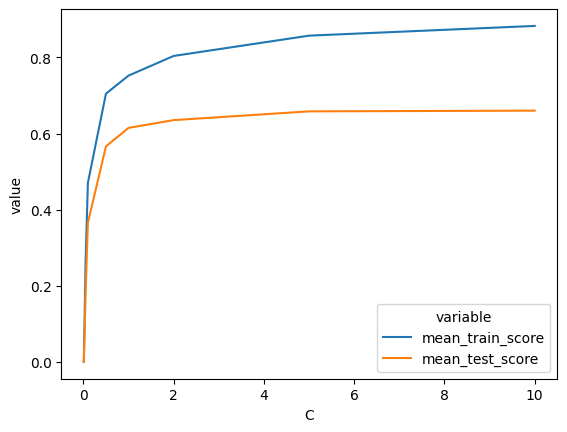

C  mean_train_score  mean_test_score
0  0.01          0.000000         0.000000
1  0.05          0.264777         0.183469
2   0.1          0.470510         0.365704
3   0.5          0.704730         0.566218
4     1          0.752247         0.614927
5     2          0.803928         0.635323
6     5          0.857235         0.658327
7    10          0.882809         0.660216

In [24]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric=gmean_scorer)

# lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=1

### Random Forest

In [28]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [5, 7, 10],
    'model__min_samples_leaf': [5, 7, 10],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric=gmean_scorer)

# rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.5805880252581901


params  mean_train_score  mean_test_score
6   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.974303         0.580588
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}          0.972424         0.568267
7   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 7, 'model__n_estimators': 200}          0.978751         0.558834
5   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 10, 'model__n_estimators': 200}          0.986689         0.489028
3    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.988773         0.482206
4    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 7, 'model__n_estimators': 200}          0.990602         0.469087
0    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.996879         0.450167
1    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 7, 'model__n_estimators': 200}          0.996638         0.431238
2   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}          0.997072         0.406834

In [22]:
# model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

## Best models

### DecisionTree

In [8]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def prune_tree(tree_model, X_train, y_train):
    path = tree_model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum value to avoid an empty tree

    param_grid = {'ccp_alpha': ccp_alphas}
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    grid_search = GridSearchCV(DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight=None, random_state=0), param_grid, cv=cv, scoring=make_scorer(geometric_mean_score))
    grid_search.fit(X_train, y_train)

    best_alpha = grid_search.best_params_['ccp_alpha']
    best_score = grid_search.best_score_
    print(f"Best ccp_alpha: {best_alpha} with CV g-mean: {best_score}")
    print(*zip(ccp_alphas, grid_search.cv_results_['mean_test_score']))

    # Train final model with best ccp_alpha
    final_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight=None, random_state=0, ccp_alpha=best_alpha)
    final_clf.fit(X_train, y_train)

    # Plotting the results
    cv_results = grid_search.cv_results_
    mean_test_scores = cv_results['mean_test_score']
    
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("CV G-mean")
    ax.set_title("Cross-validated g-mean vs alpha")
    ax.plot(ccp_alphas, mean_test_scores, marker="o", drawstyle="steps-post")
    plt.show()

    return final_clf

Best ccp_alpha: 0.0 with CV g-mean: 0.7659373295707772
(0.0, 0.7659373295707772) (0.0004061156235069317, 0.7659373295707772) (0.0012930206226313794, 0.7659373295707772) (0.0013511286867688294, 0.7659373295707772) (0.003448424930412624, 0.7659373295707772) (0.013300605688148948, 0.7455949309517508) (0.015853806653043256, 0.7402830679104634) (0.04547536730588844, 0.4107372855013057)


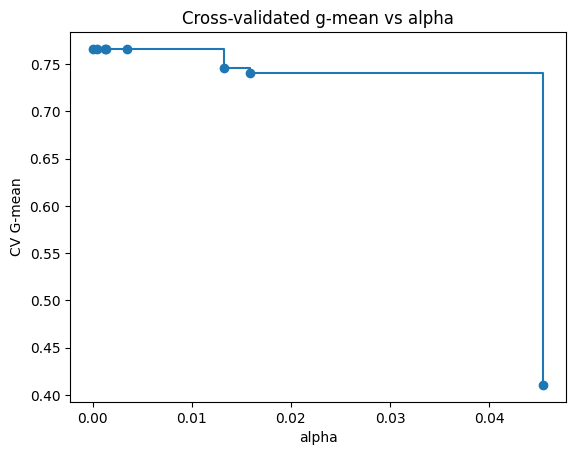

Test set G-mean with best ccp_alpha: 0.8757926052598939


In [9]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight=None)

final_model = prune_tree(model_tree, X_train, y_train)

test_g_mean = geometric_mean_score(y_test, final_model.predict(X_test)) 
print(f"Test set G-mean with best ccp_alpha: {test_g_mean}")


### Best tree placed in a report!

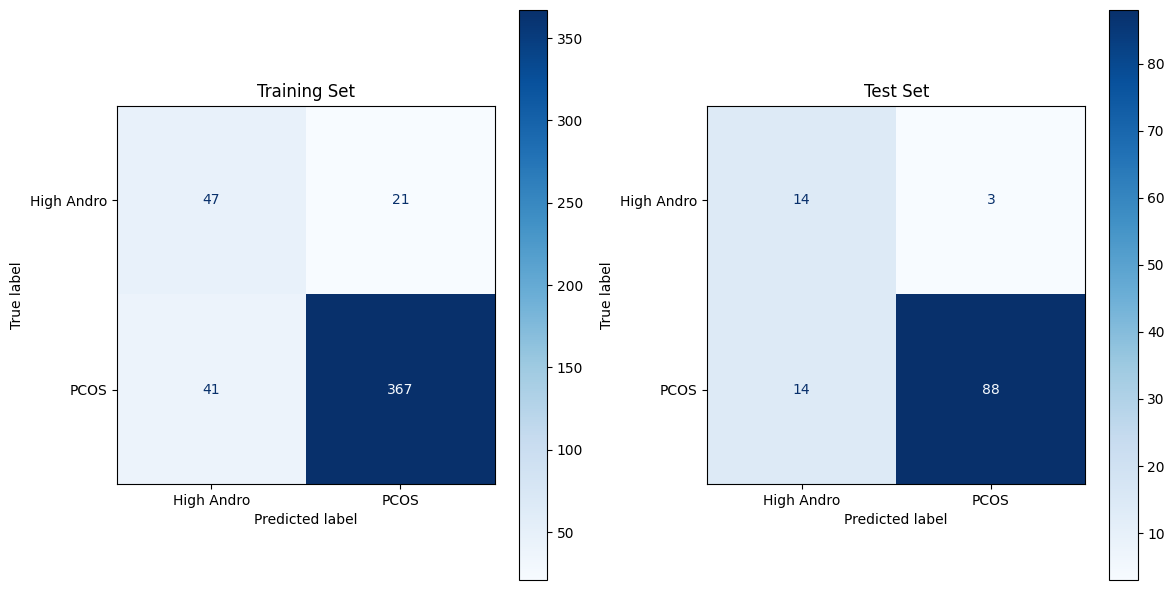

Training set
G-mean: 0.788
              precision    recall  f1-score   support

  High Andro       0.53      0.69      0.60        68
        PCOS       0.95      0.90      0.92       408

    accuracy                           0.87       476
   macro avg       0.74      0.80      0.76       476
weighted avg       0.89      0.87      0.88       476

G-mean: 0.843
Test set
              precision    recall  f1-score   support

  High Andro       0.50      0.82      0.62        17
        PCOS       0.97      0.86      0.91       102

    accuracy                           0.86       119
   macro avg       0.73      0.84      0.77       119
weighted avg       0.90      0.86      0.87       119



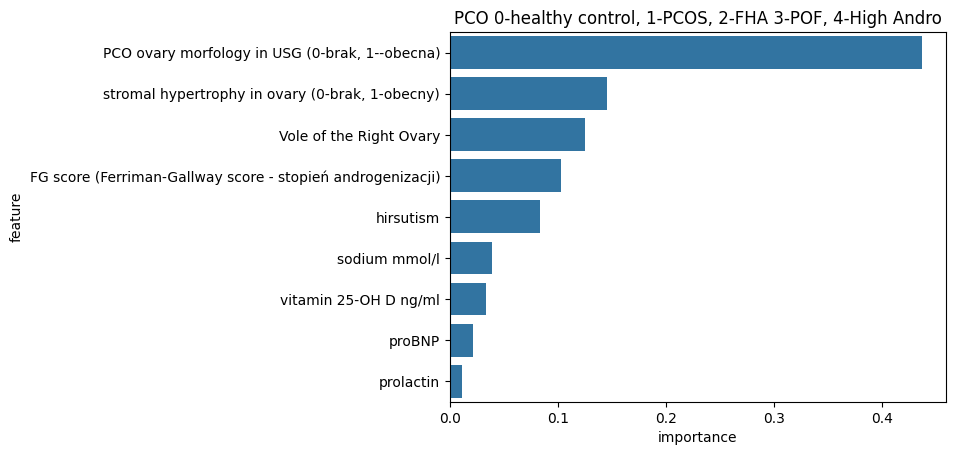

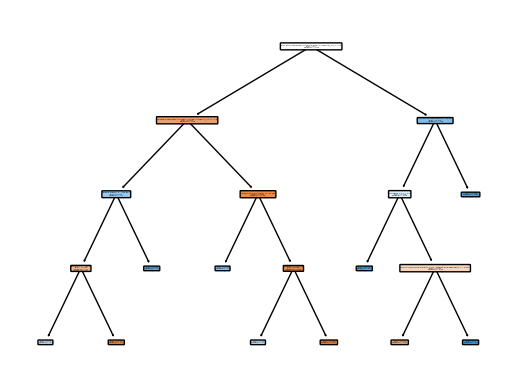

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


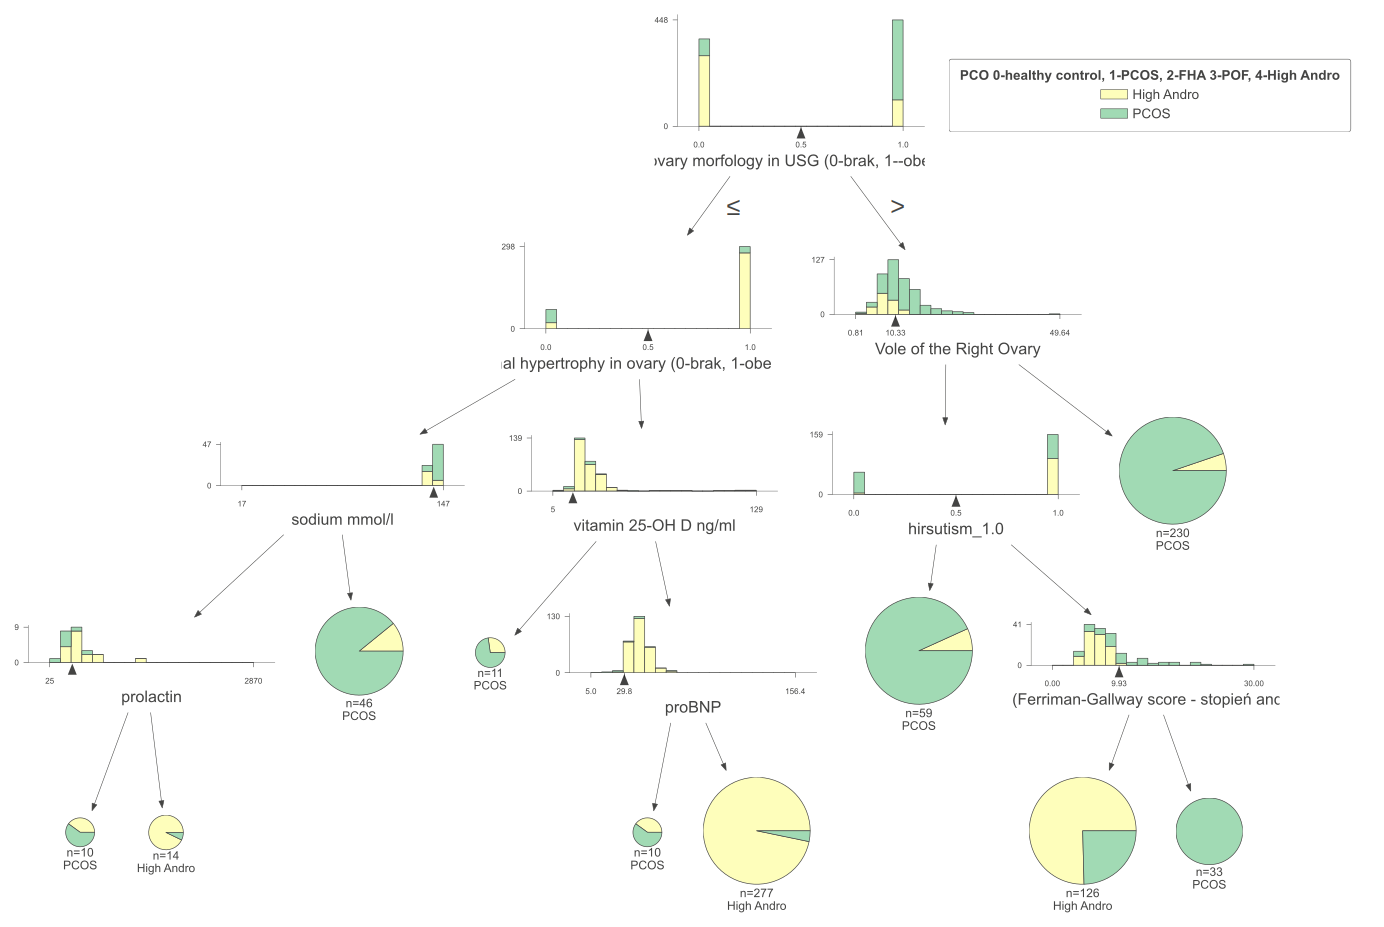

In [46]:
#  SMOTE
import random

random.seed(0)

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight=None, ccp_alpha=0.003448424930412624)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text

tree_rules = export_text(pipeline_tree['model'], class_names=['High Andro', 'PCOS'], feature_names=list(pipeline_tree['preprocessor'].get_feature_names_out()))
print(tree_rules)

|--- PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50
|   |--- stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 <= 0.50
|   |   |--- sodium mmol/l <= 140.82
|   |   |   |--- prolactin <= 340.50
|   |   |   |   |--- class: PCOS
|   |   |   |--- prolactin >  340.50
|   |   |   |   |--- class: High Andro
|   |   |--- sodium mmol/l >  140.82
|   |   |   |--- class: PCOS
|   |--- stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 >  0.50
|   |   |--- vitamin 25-OH D ng/ml <= 17.20
|   |   |   |--- class: PCOS
|   |   |--- vitamin 25-OH D ng/ml >  17.20
|   |   |   |--- proBNP <= 29.76
|   |   |   |   |--- class: PCOS
|   |   |   |--- proBNP >  29.76
|   |   |   |   |--- class: High Andro
|--- PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 >  0.50
|   |--- Vole of the Right Ovary <= 10.33
|   |   |--- hirsutism_1.0 <= 0.50
|   |   |   |--- class: PCOS
|   |   |--- hirsutism_1.0 >  0.50
|   |   |   |--- FG score (Ferriman-Gallway score - stopień androgenizacji) <= 9.93
|   |

Tree with only real data - the generated data by SMOTE are removed

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


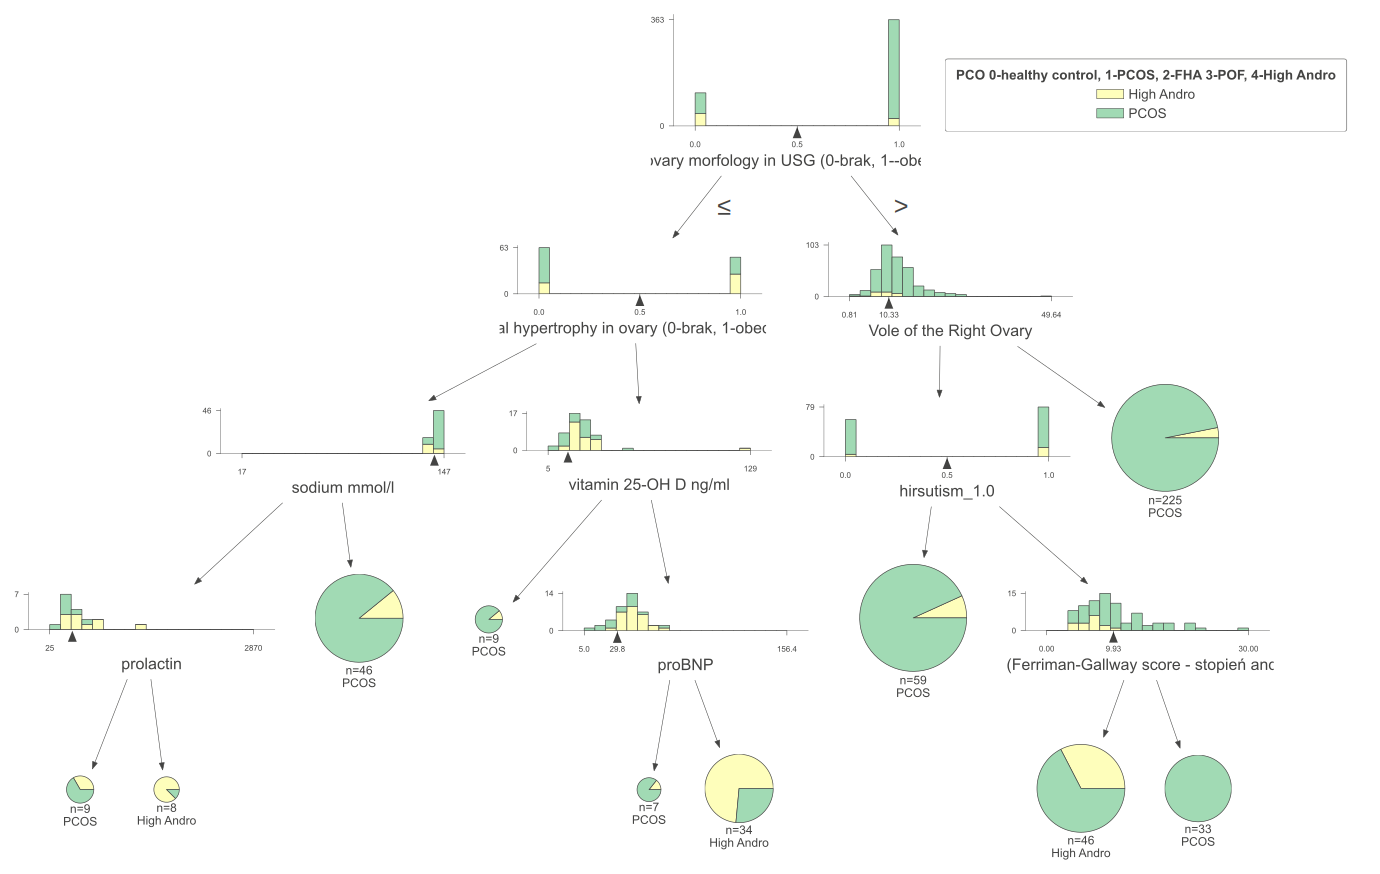

In [48]:
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

Tree on a test set

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


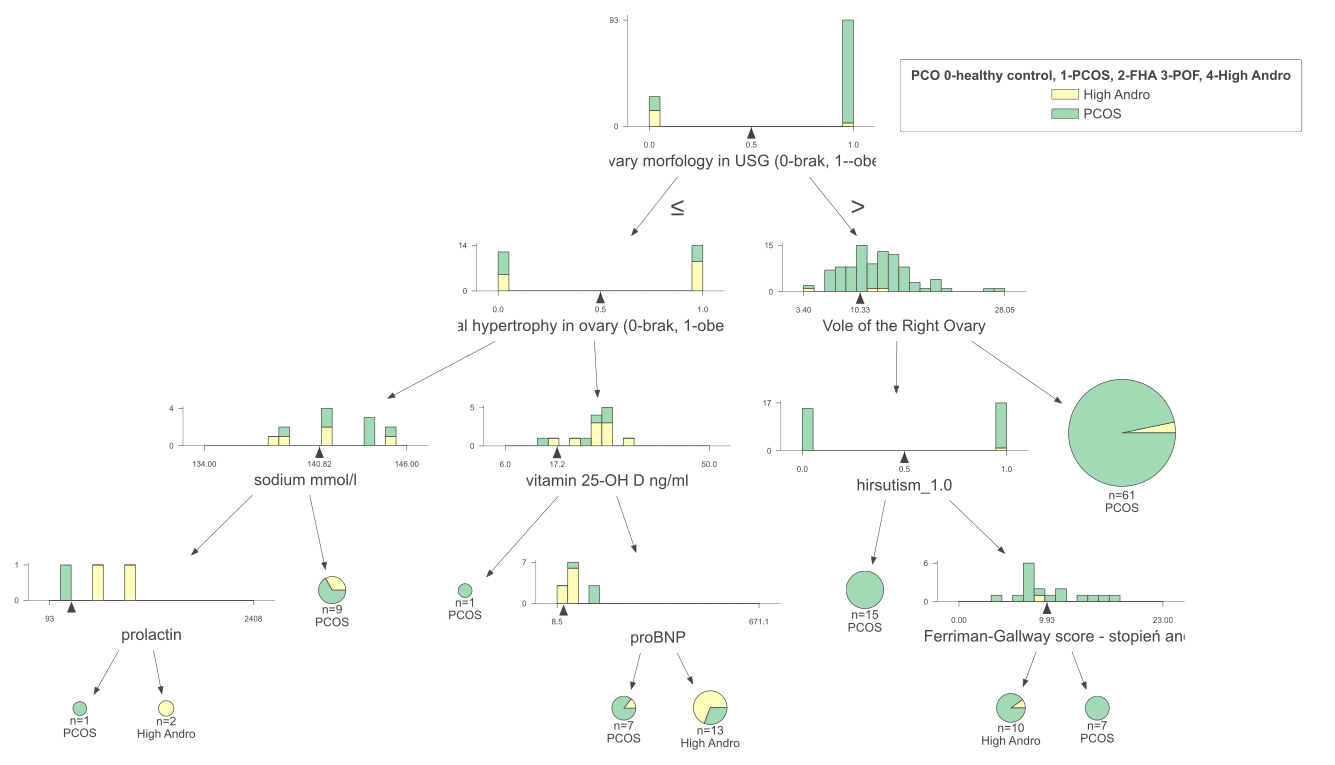

In [49]:
plot_fancy_tree_smote(pipeline_tree, X_test, y_test, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

|--- PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50
|   |--- stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 <= 0.50
|   |   |--- sodium mmol/l <= 140.82
|   |   |   |--- age <= 25.70
|   |   |   |   |--- class: High Andro
|   |   |   |--- age >  25.70
|   |   |   |   |--- class: PCOS
|   |   |--- sodium mmol/l >  140.82
|   |   |   |--- class: PCOS
|   |--- stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 >  0.50
|   |   |--- vitamin 25-OH D ng/ml <= 17.20
|   |   |   |--- class: PCOS
|   |   |--- vitamin 25-OH D ng/ml >  17.20
|   |   |   |--- proBNP <= 29.76
|   |   |   |   |--- class: PCOS
|   |   |   |--- proBNP >  29.76
|   |   |   |   |--- class: High Andro
|--- PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 >  0.50
|   |--- Vole of the Right Ovary <= 10.33
|   |   |--- hirsutism_1.0 <= 0.50
|   |   |   |--- class: PCOS
|   |   |--- hirsutism_1.0 >  0.50
|   |   |   |--- FG score (Ferriman-Gallway score - stopień androgenizacji) <= 9.93
|   |   |   |   |--

In [41]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

def tree_to_code(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    paths = []

    def recurse(node, depth, path):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            path_left = f"{path}if ({name} <= {threshold:.2f}) "
            recurse(tree_.children_left[node], depth + 1, path_left)
            path_right = f"{path}if ({name} > {threshold:.2f}) "
            recurse(tree_.children_right[node], depth + 1, path_right)
        else:
            proba = np.max(tree_.value[node]) / np.sum(tree_.value[node]) * 100
            samples = np.sum(tree_.value[node])
            predicted_class = class_names[np.argmax(tree_.value[node])]
            paths.append(f"{path}then class: {predicted_class} (proba: {proba:.2f}%) | based on {samples} samples")

    recurse(0, 1, "")
    return paths

rules = tree_to_code(pipeline_tree['model'], list(pipeline_tree['preprocessor'].get_feature_names_out()), ['High Andro', 'PCOS'])
for rule in rules:
    print(rule)


if (PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50) if (stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 <= 0.50) if (sodium mmol/l <= 140.82) if (age <= 25.70) then class: High Andro (proba: 92.86%) | based on 1.0 samples
if (PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50) if (stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 <= 0.50) if (sodium mmol/l <= 140.82) if (age > 25.70) then class: PCOS (proba: 60.00%) | based on 1.0 samples
if (PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50) if (stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 <= 0.50) if (sodium mmol/l > 140.82) then class: PCOS (proba: 89.13%) | based on 1.0 samples
if (PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50) if (stromal hypertrophy in ovary (0-brak, 1-obecny)_1.0 > 0.50) if (vitamin 25-OH D ng/ml <= 17.20) then class: PCOS (proba: 72.73%) | based on 1.0 samples
if (PCO ovary morfology in USG (0-brak, 1--obecna)_1.0 <= 0.50) if (stromal hypertrophy in ovary (

In [34]:
for i in pipeline_tree['model'].tree_.feature:
    print(i)

16
24
117
51
-2
-2
-2
34
-2
96
-2
-2
104
11
-2
135
-2
-2
-2


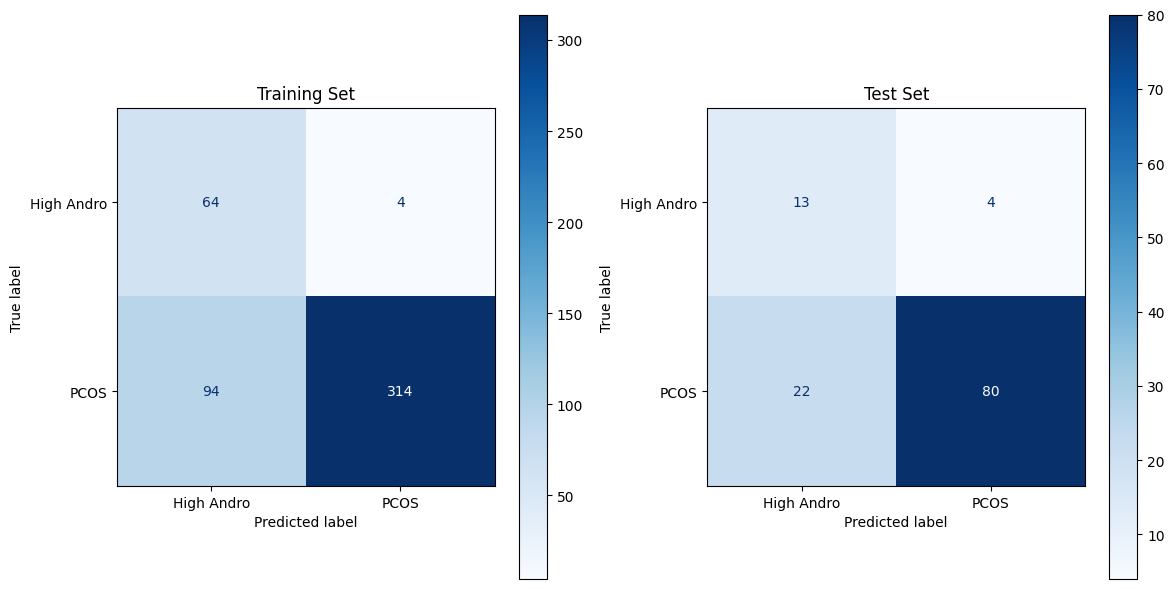

Training set
G-mean: 0.851
              precision    recall  f1-score   support

  High Andro       0.41      0.94      0.57        68
        PCOS       0.99      0.77      0.87       408

    accuracy                           0.79       476
   macro avg       0.70      0.86      0.72       476
weighted avg       0.90      0.79      0.82       476

G-mean: 0.774
Test set
              precision    recall  f1-score   support

  High Andro       0.37      0.76      0.50        17
        PCOS       0.95      0.78      0.86       102

    accuracy                           0.78       119
   macro avg       0.66      0.77      0.68       119
weighted avg       0.87      0.78      0.81       119



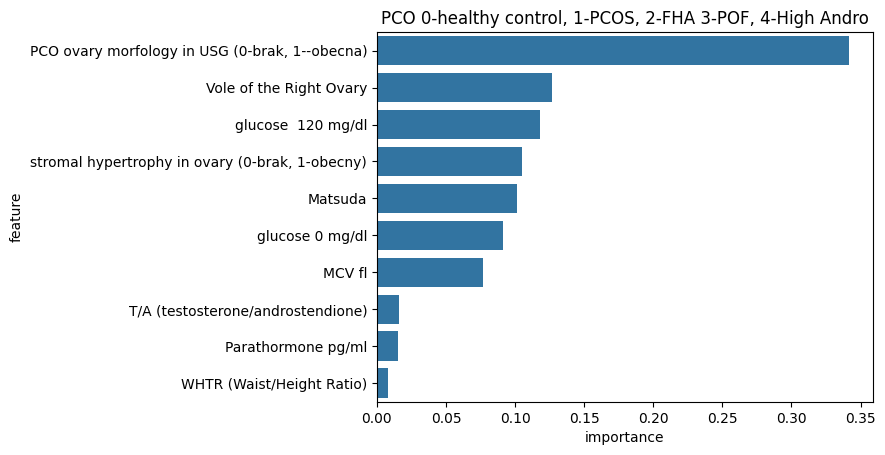

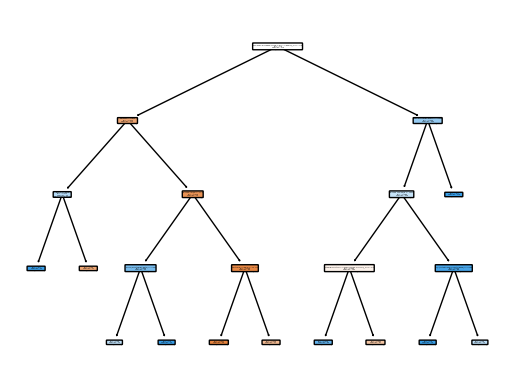

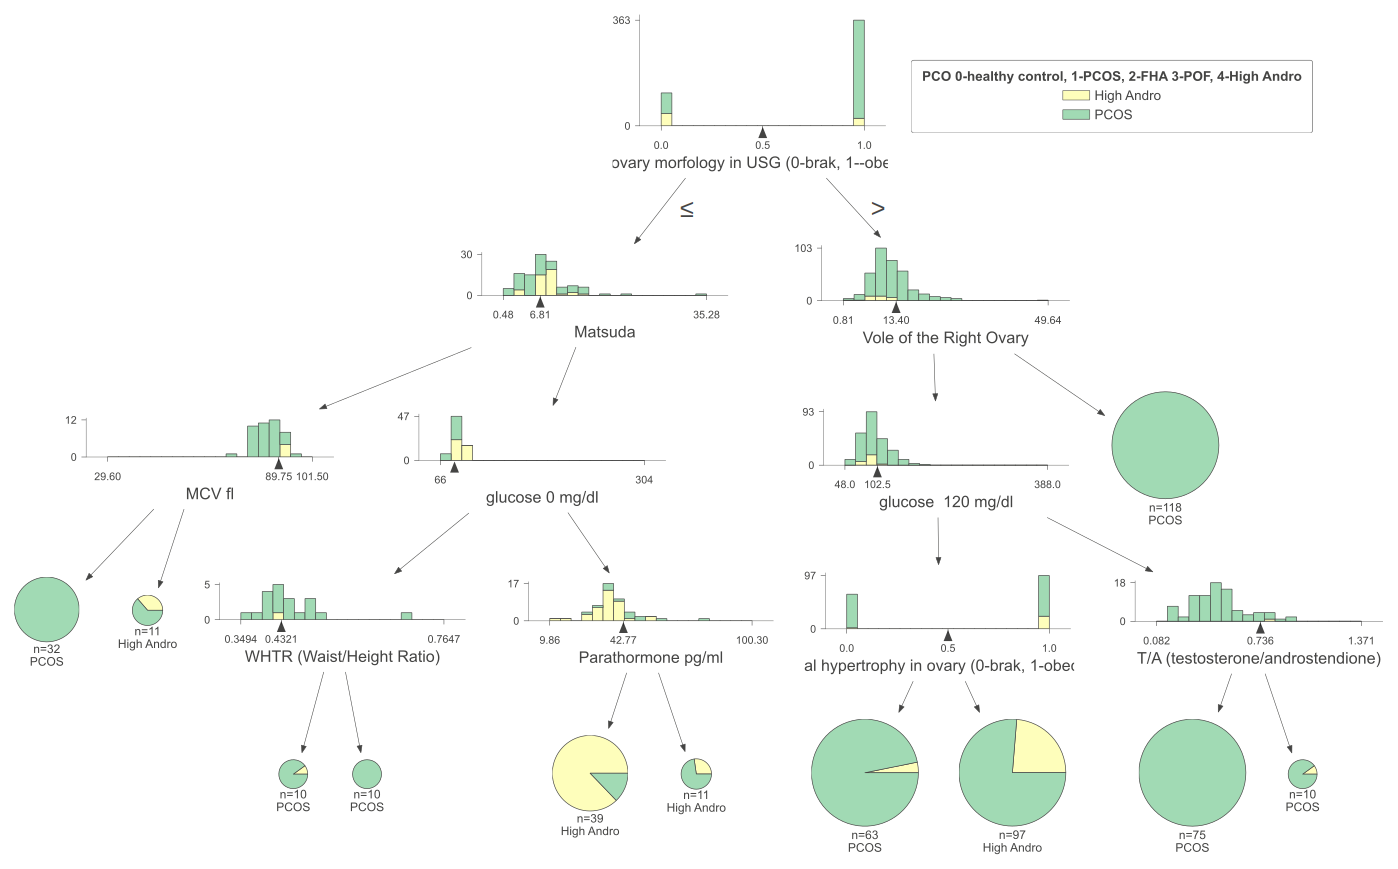

In [11]:
#  bez smote
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight='balanced')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

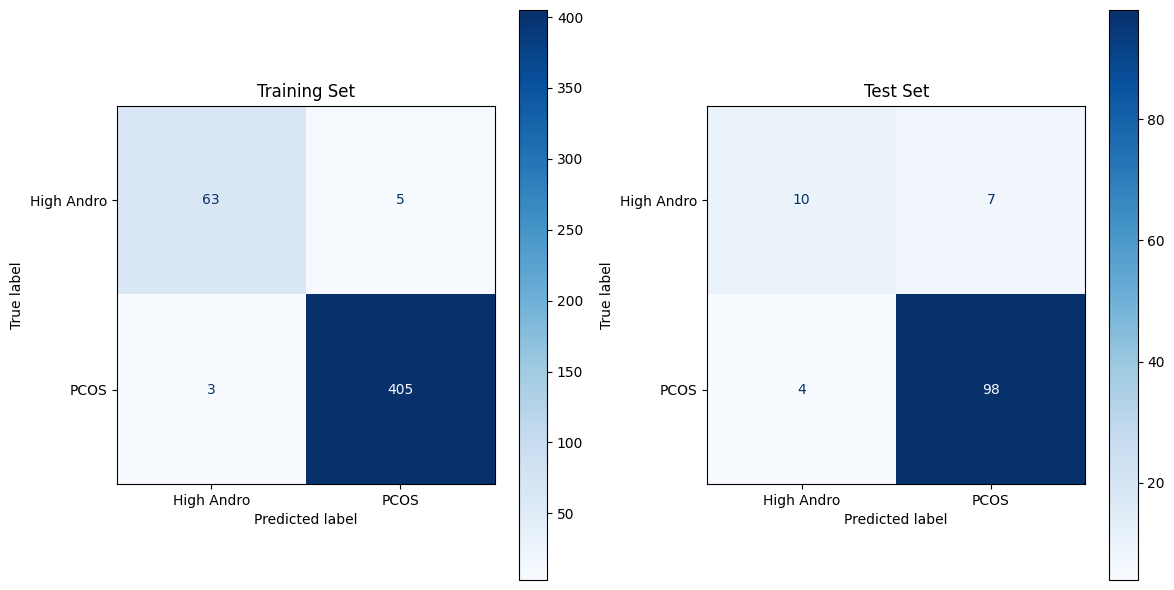

Training set
G-mean: 0.959
              precision    recall  f1-score   support

  High Andro       0.95      0.93      0.94        68
        PCOS       0.99      0.99      0.99       408

    accuracy                           0.98       476
   macro avg       0.97      0.96      0.97       476
weighted avg       0.98      0.98      0.98       476

G-mean: 0.752
Test set
              precision    recall  f1-score   support

  High Andro       0.71      0.59      0.65        17
        PCOS       0.93      0.96      0.95       102

    accuracy                           0.91       119
   macro avg       0.82      0.77      0.80       119
weighted avg       0.90      0.91      0.90       119



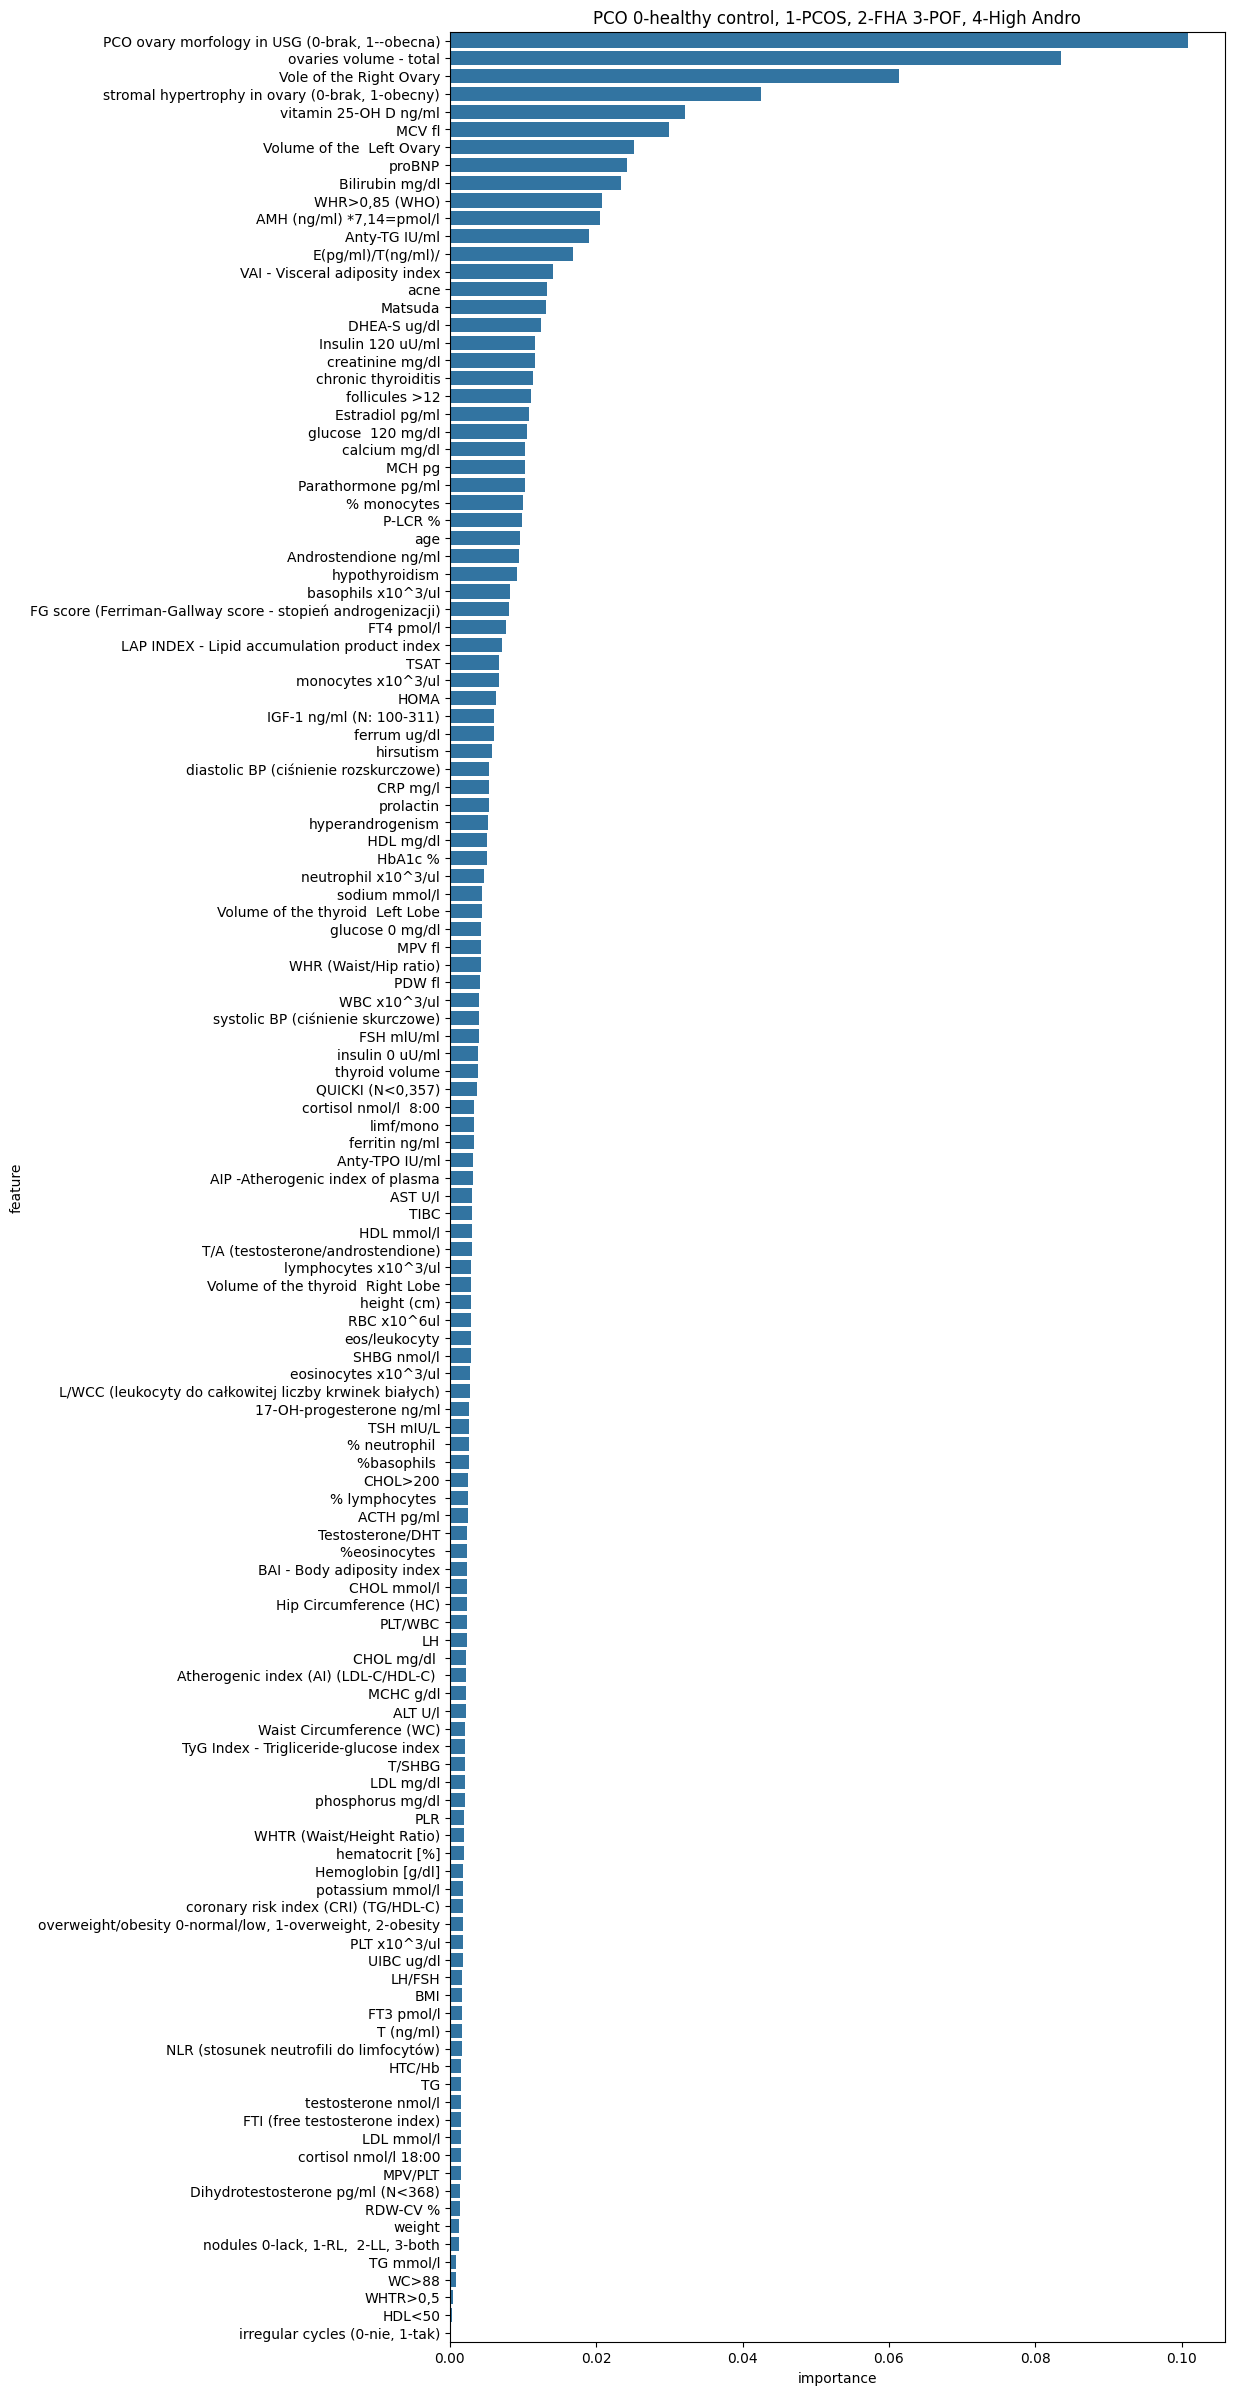

In [12]:
#  smote
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_rf)

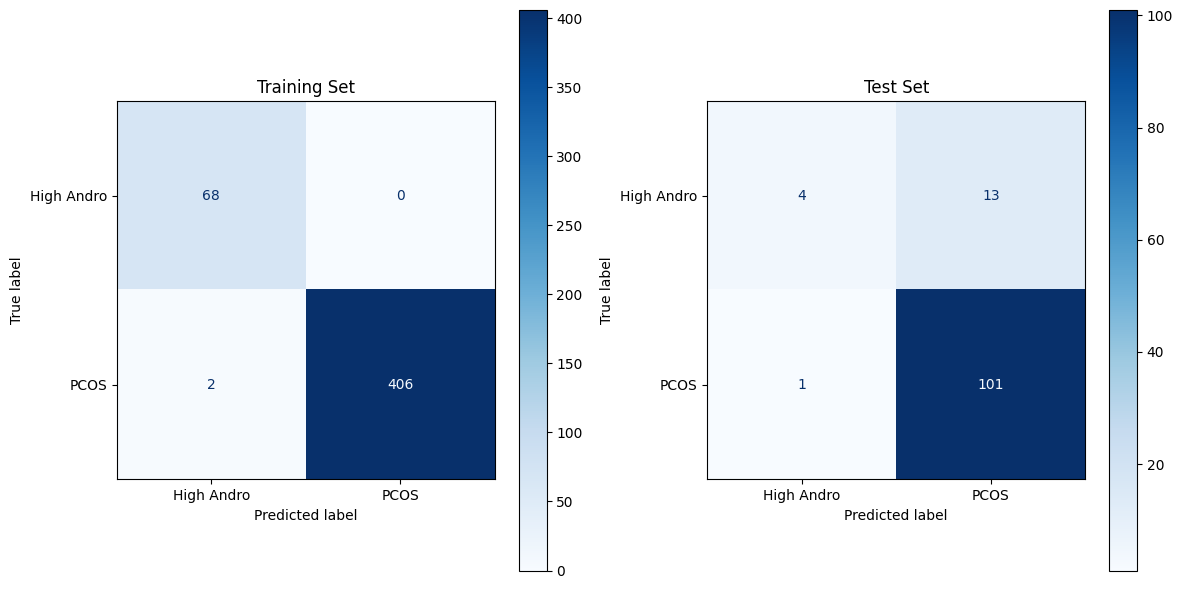

Training set
G-mean: 0.998
              precision    recall  f1-score   support

  High Andro       0.97      1.00      0.99        68
        PCOS       1.00      1.00      1.00       408

    accuracy                           1.00       476
   macro avg       0.99      1.00      0.99       476
weighted avg       1.00      1.00      1.00       476

G-mean: 0.483
Test set
              precision    recall  f1-score   support

  High Andro       0.80      0.24      0.36        17
        PCOS       0.89      0.99      0.94       102

    accuracy                           0.88       119
   macro avg       0.84      0.61      0.65       119
weighted avg       0.87      0.88      0.85       119



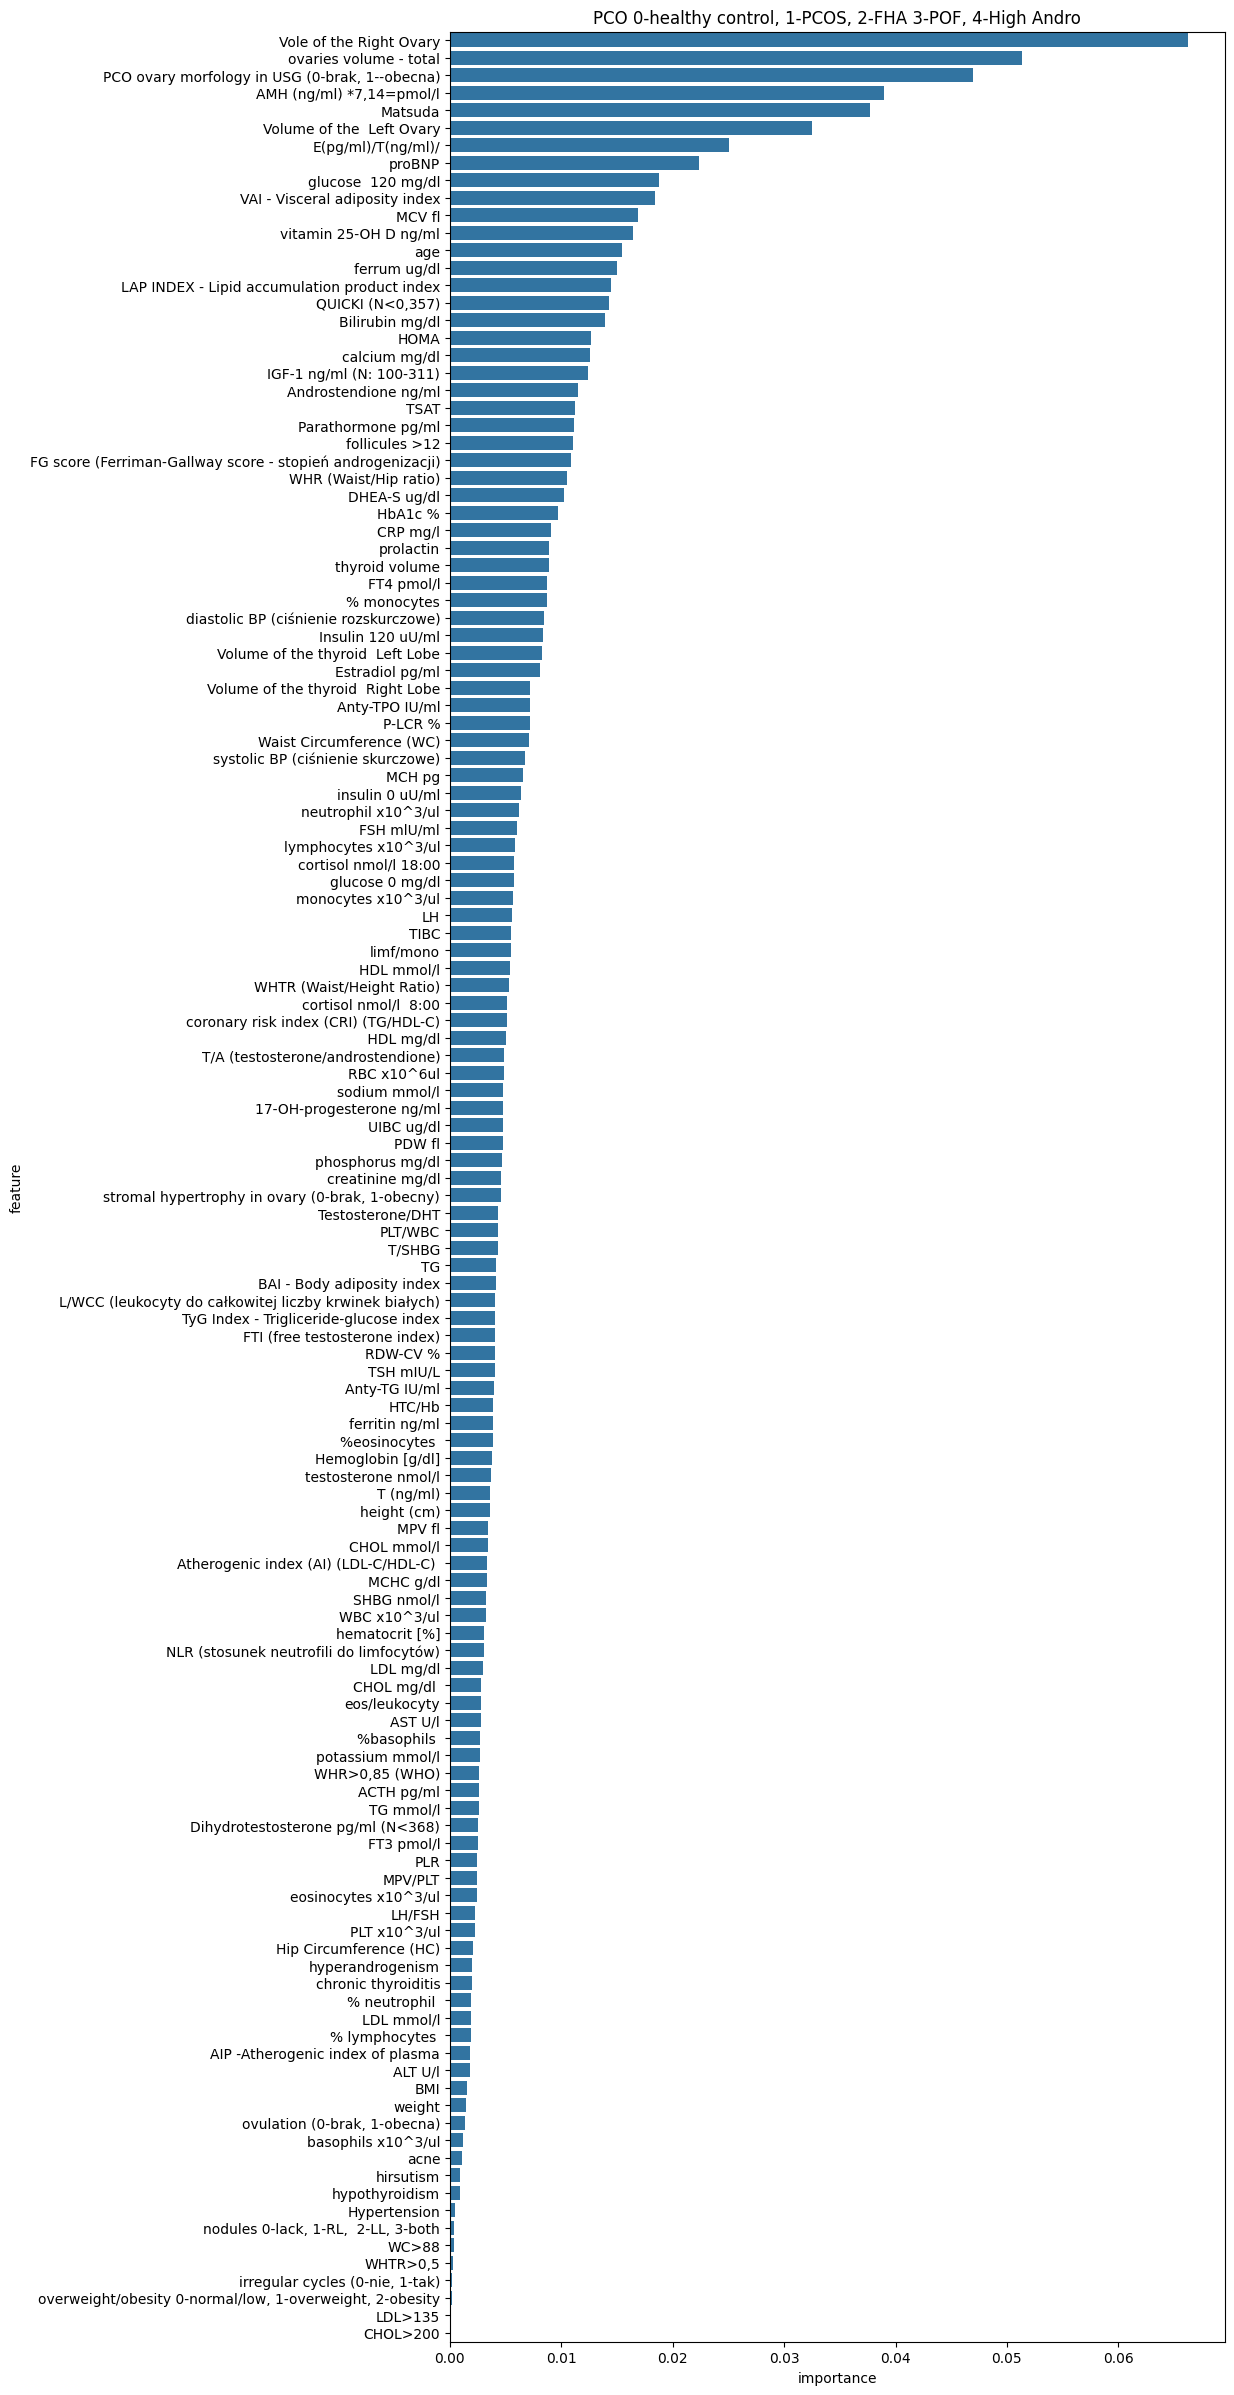

In [13]:
#  bez smote
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

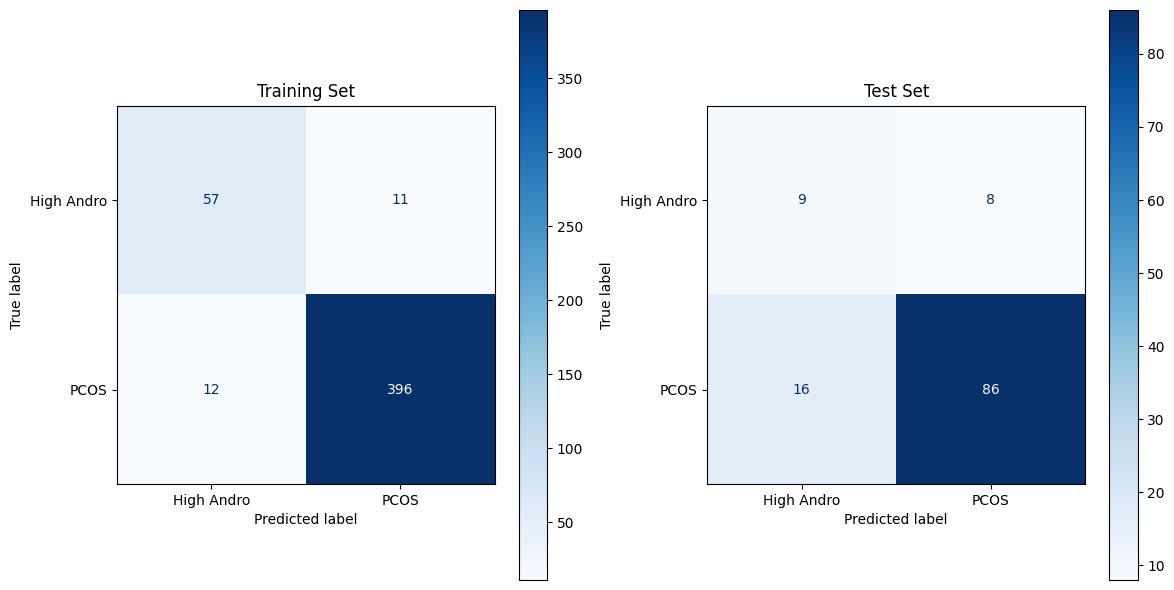

Training set
G-mean: 0.902
              precision    recall  f1-score   support

  High Andro       0.83      0.84      0.83        68
        PCOS       0.97      0.97      0.97       408

    accuracy                           0.95       476
   macro avg       0.90      0.90      0.90       476
weighted avg       0.95      0.95      0.95       476

G-mean: 0.668
Test set
              precision    recall  f1-score   support

  High Andro       0.36      0.53      0.43        17
        PCOS       0.91      0.84      0.88       102

    accuracy                           0.80       119
   macro avg       0.64      0.69      0.65       119
weighted avg       0.84      0.80      0.81       119



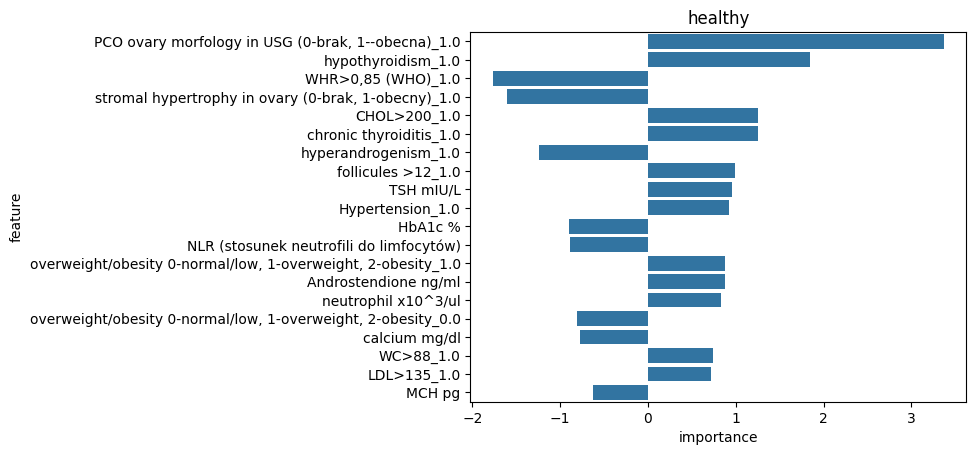

In [14]:
#  smote
model_lr = LogisticRegression(C=1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr  = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

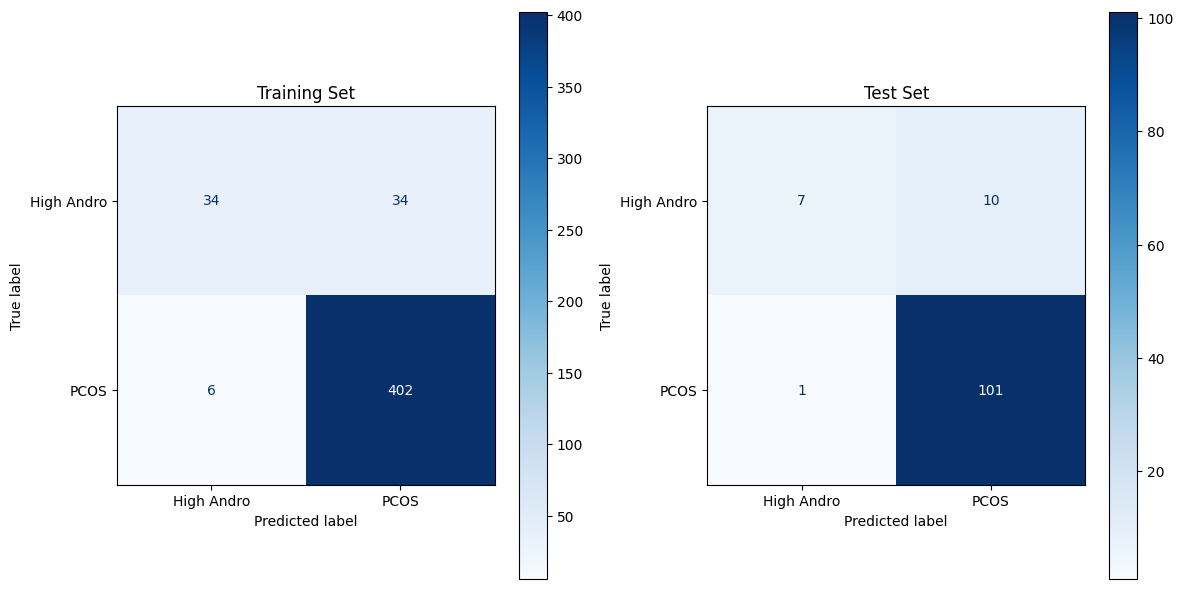

Training set
G-mean: 0.702
              precision    recall  f1-score   support

  High Andro       0.85      0.50      0.63        68
        PCOS       0.92      0.99      0.95       408

    accuracy                           0.92       476
   macro avg       0.89      0.74      0.79       476
weighted avg       0.91      0.92      0.91       476

G-mean: 0.639
Test set
              precision    recall  f1-score   support

  High Andro       0.88      0.41      0.56        17
        PCOS       0.91      0.99      0.95       102

    accuracy                           0.91       119
   macro avg       0.89      0.70      0.75       119
weighted avg       0.90      0.91      0.89       119



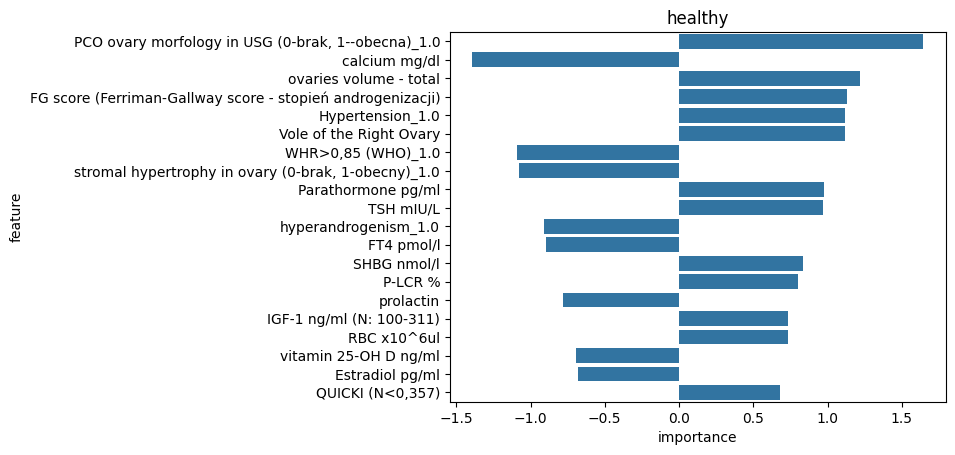

In [15]:
model_lr = LogisticRegression(C=1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [12]:
selected_features_map = {}

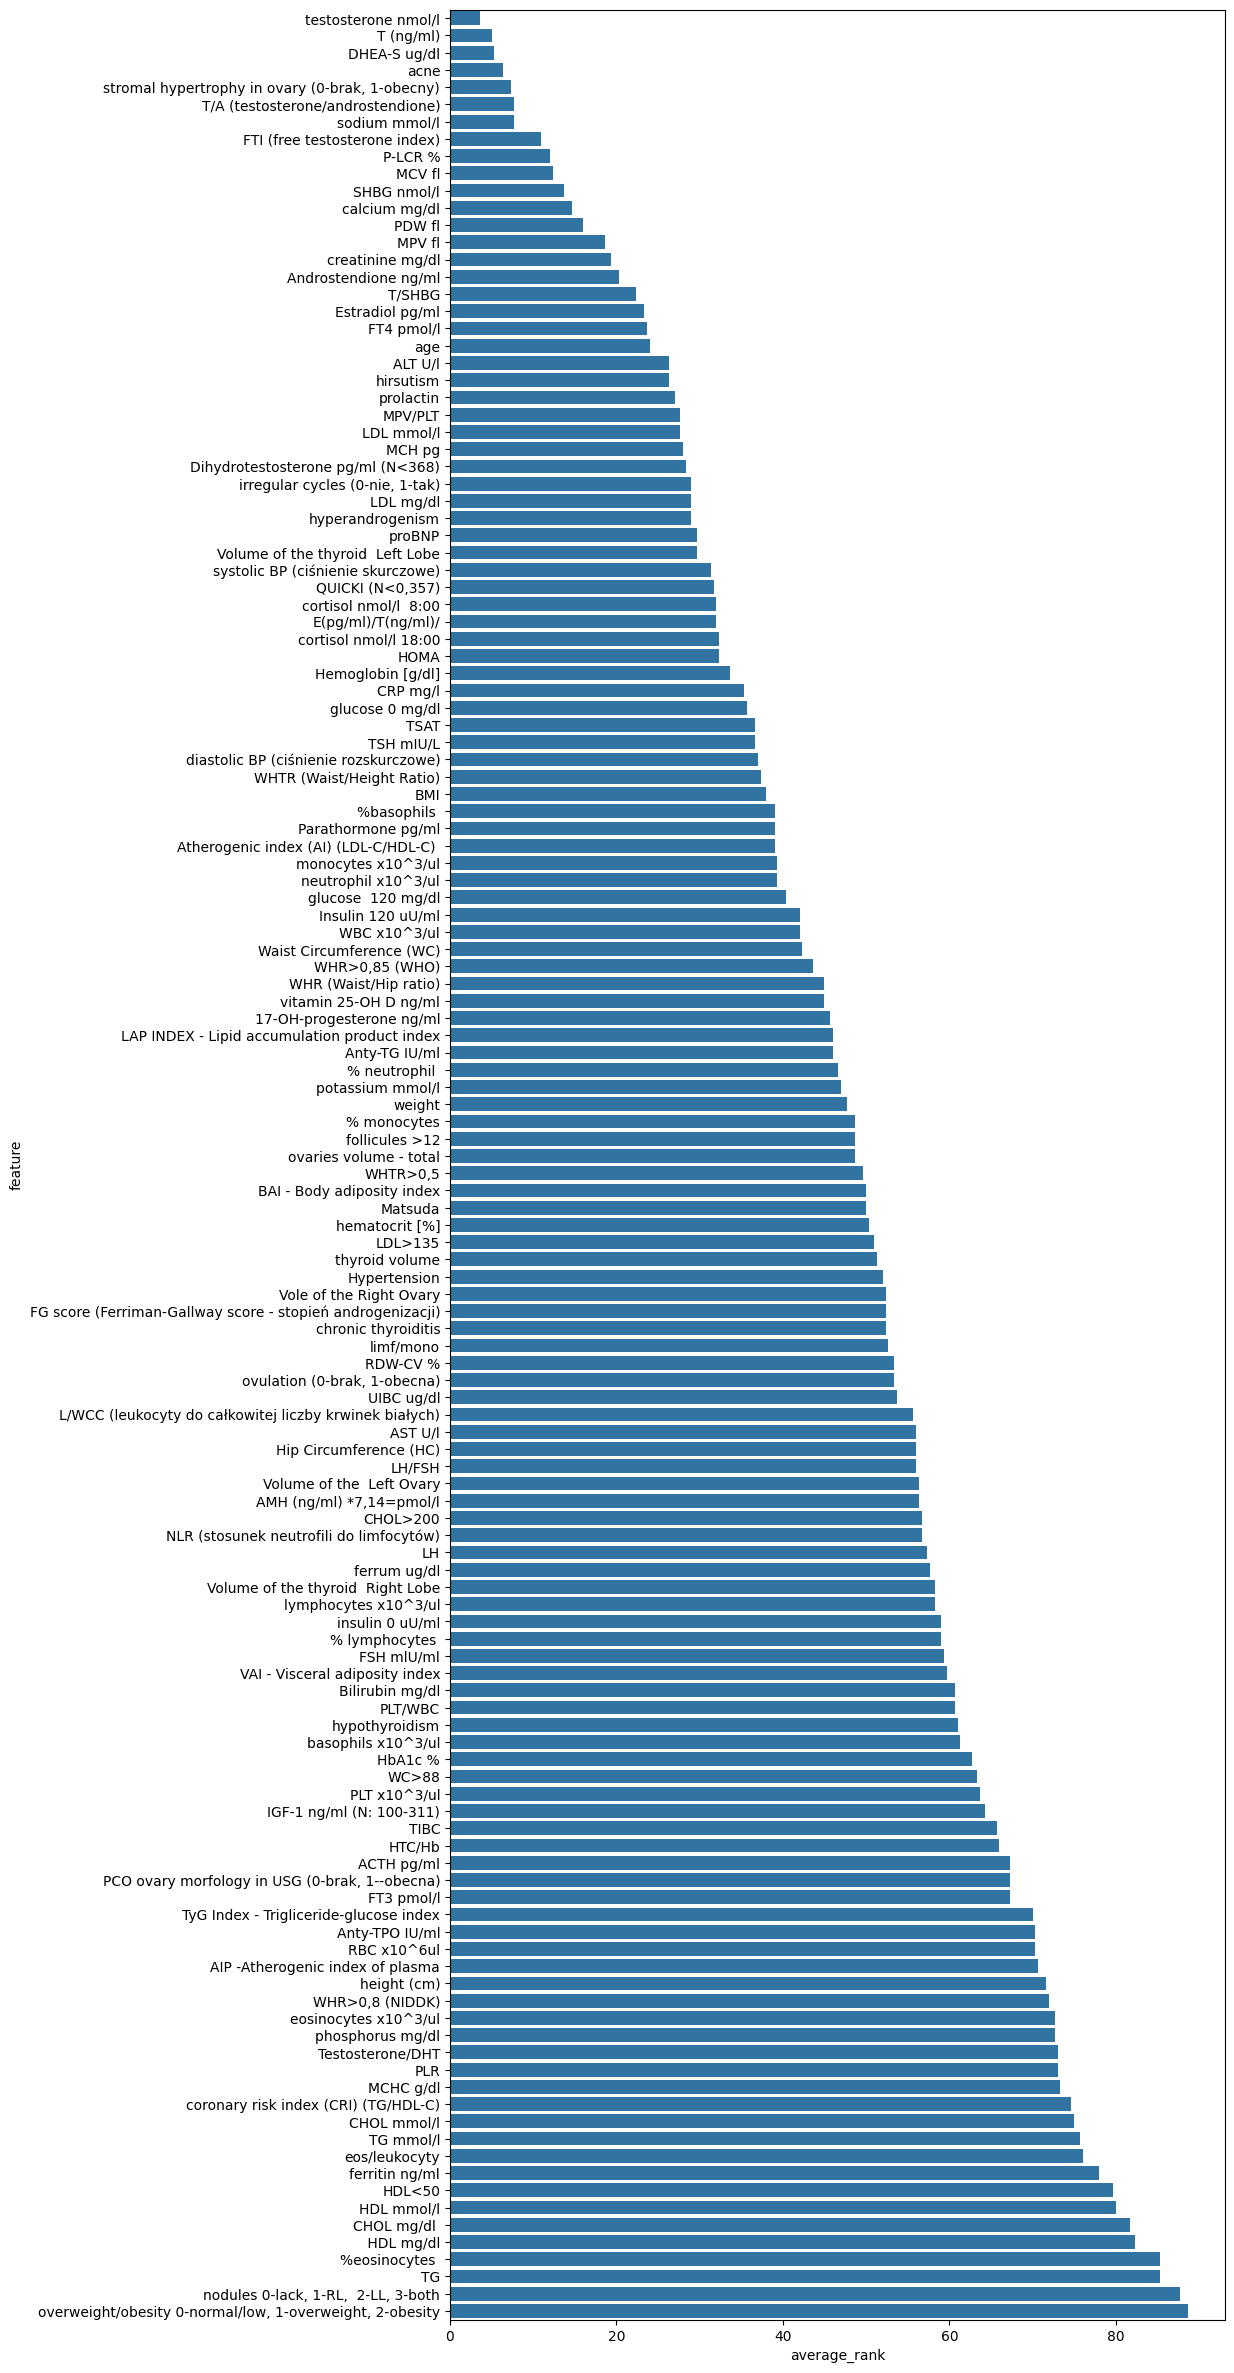

In [13]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [14]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 51 features:


['testosterone nmol/l',
 'T (ng/ml)',
 'DHEA-S ug/dl',
 'acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'T/A (testosterone/androstendione)',
 'sodium mmol/l',
 'FTI (free testosterone index)',
 'P-LCR %',
 'MCV fl',
 'SHBG nmol/l',
 'calcium mg/dl',
 'PDW fl',
 'MPV fl',
 'creatinine mg/dl',
 'Androstendione ng/ml',
 'T/SHBG',
 'Estradiol pg/ml',
 'FT4 pmol/l',
 'age',
 'ALT U/l',
 'hirsutism',
 'prolactin',
 'MPV/PLT',
 'LDL mmol/l',
 'MCH pg',
 'Dihydrotestosterone pg/ml (N<368)',
 'irregular cycles (0-nie, 1-tak)',
 'LDL mg/dl',
 'hyperandrogenism',
 'proBNP',
 'Volume of the thyroid  Left Lobe',
 'systolic BP (ciśnienie skurczowe)',
 'QUICKI (N<0,357)',
 'cortisol nmol/l  8:00',
 'E(pg/ml)/T(ng/ml)/',
 'cortisol nmol/l 18:00',
 'HOMA',
 'Hemoglobin [g/dl]',
 'CRP mg/l',
 'glucose 0 mg/dl',
 'TSAT',
 'TSH mIU/L',
 'diastolic BP (ciśnienie rozskurczowe)',
 'WHTR (Waist/Height Ratio)',
 'BMI',
 '%basophils ',
 'Parathormone pg/ml',
 'Atherogenic index (AI) (LDL-C/HDL-C) '

## Feature selection

### Chi 2

Selected 28 features


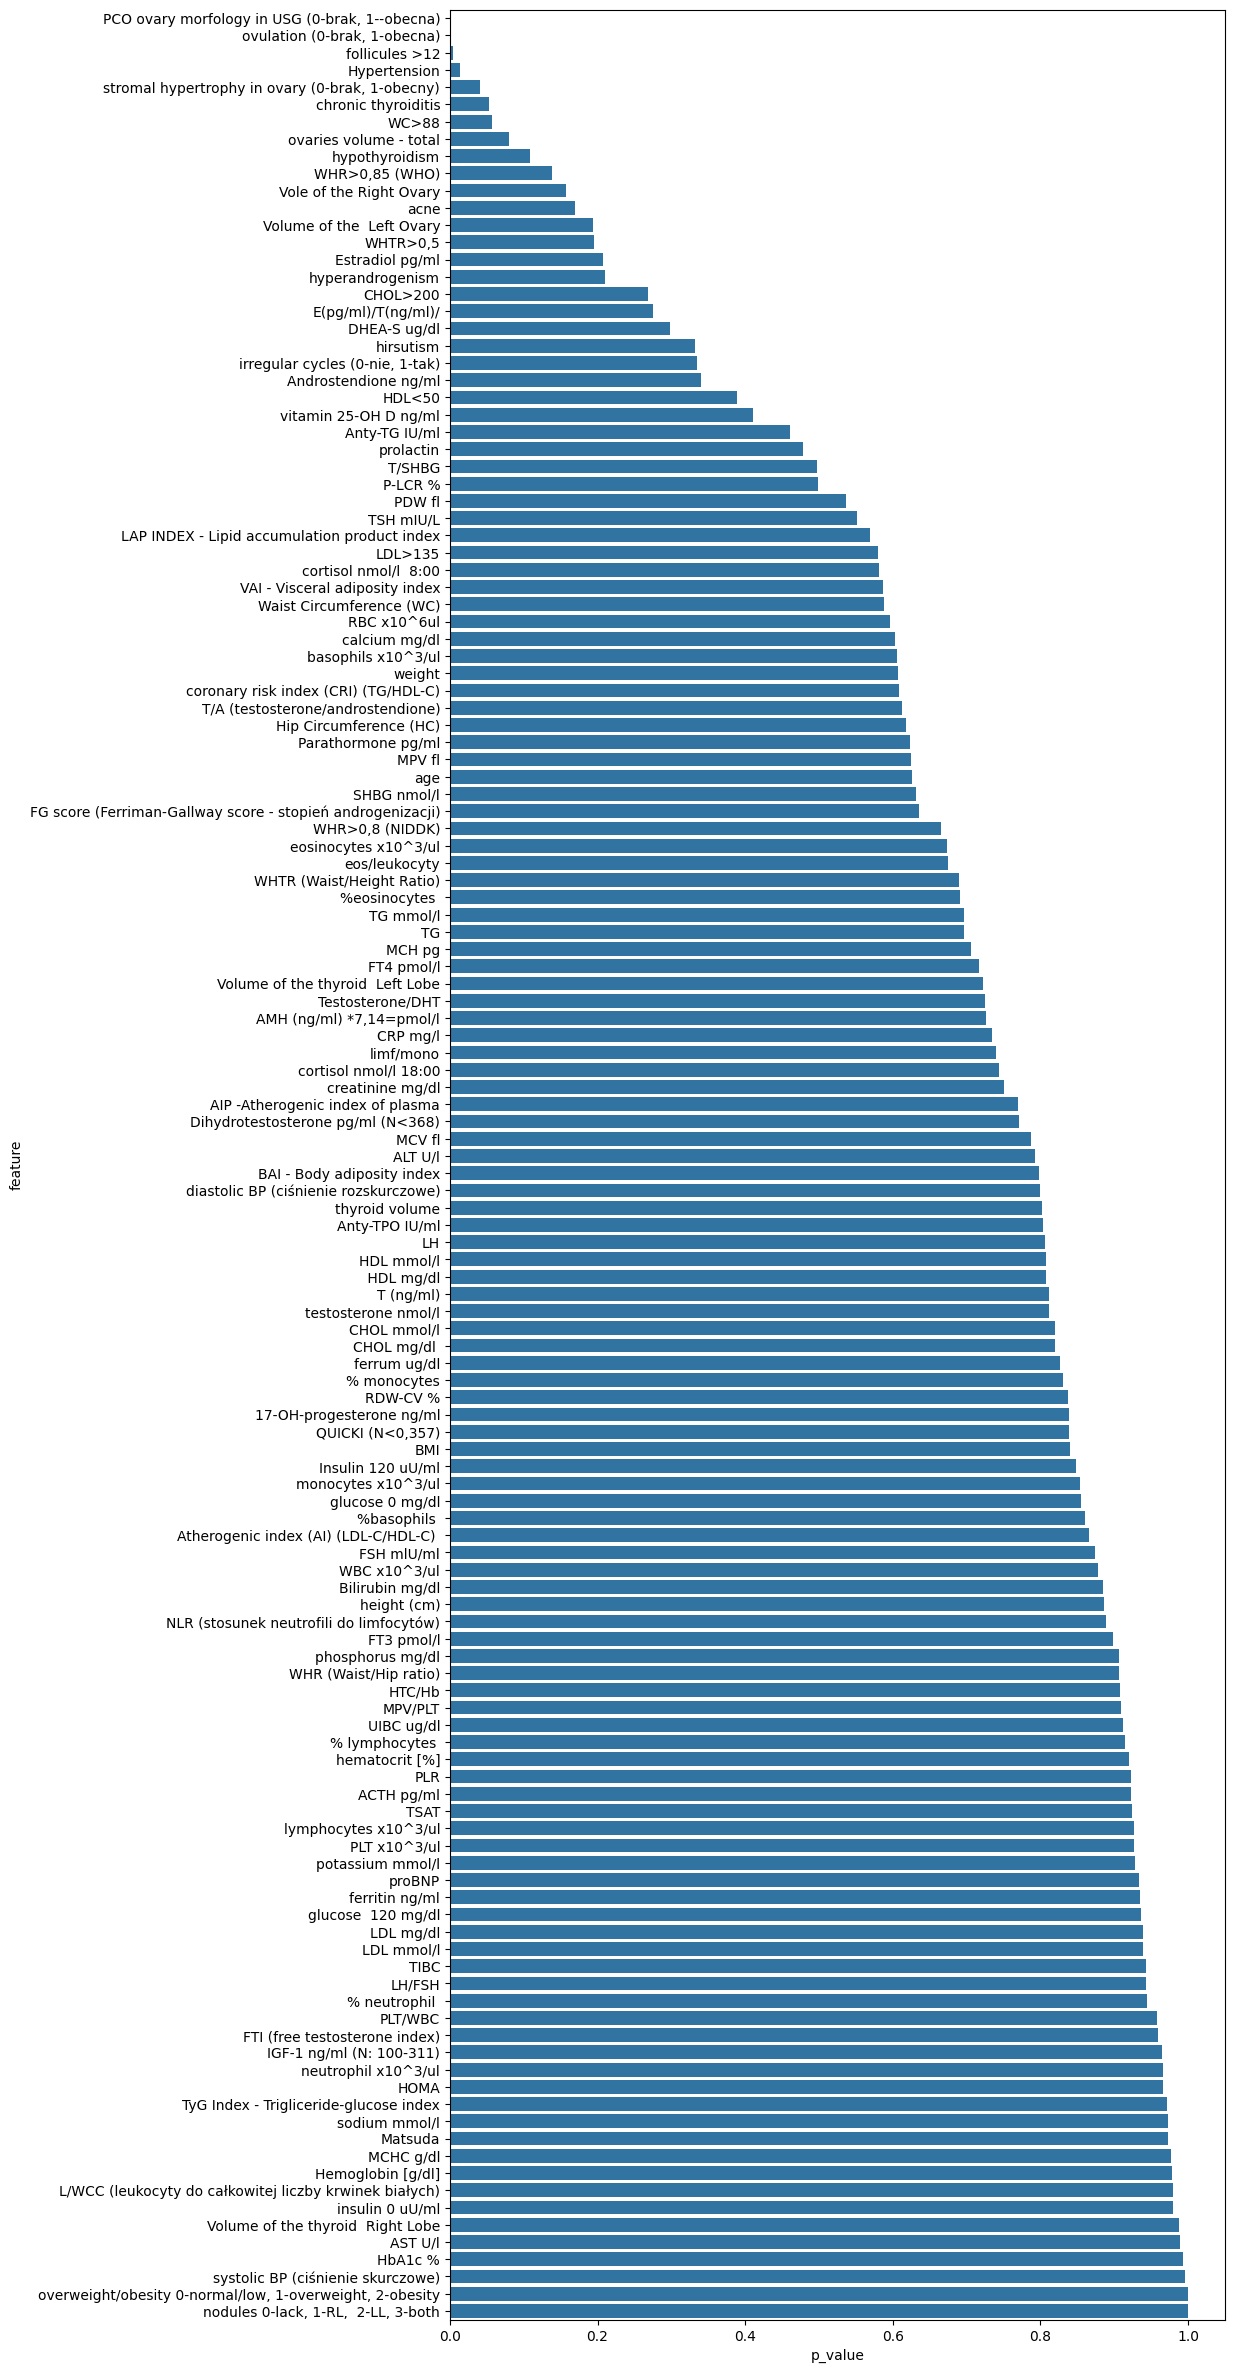

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'ovulation (0-brak, 1-obecna)',
 'follicules >12',
 'Hypertension',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'chronic thyroiditis',
 'WC>88',
 'ovaries volume - total',
 'hypothyroidism',
 'WHR>0,85 (WHO)',
 'Vole of the Right Ovary',
 'acne',
 'Volume of the  Left Ovary',
 'WHTR>0,5',
 'Estradiol pg/ml',
 'hyperandrogenism',
 'CHOL>200',
 'E(pg/ml)/T(ng/ml)/',
 'DHEA-S ug/dl',
 'hirsutism',
 'irregular cycles (0-nie, 1-tak)',
 'Androstendione ng/ml',
 'HDL<50',
 'vitamin 25-OH D ng/ml',
 'Anty-TG IU/ml',
 'prolactin',
 'T/SHBG',
 'P-LCR %']

In [13]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=0.5)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

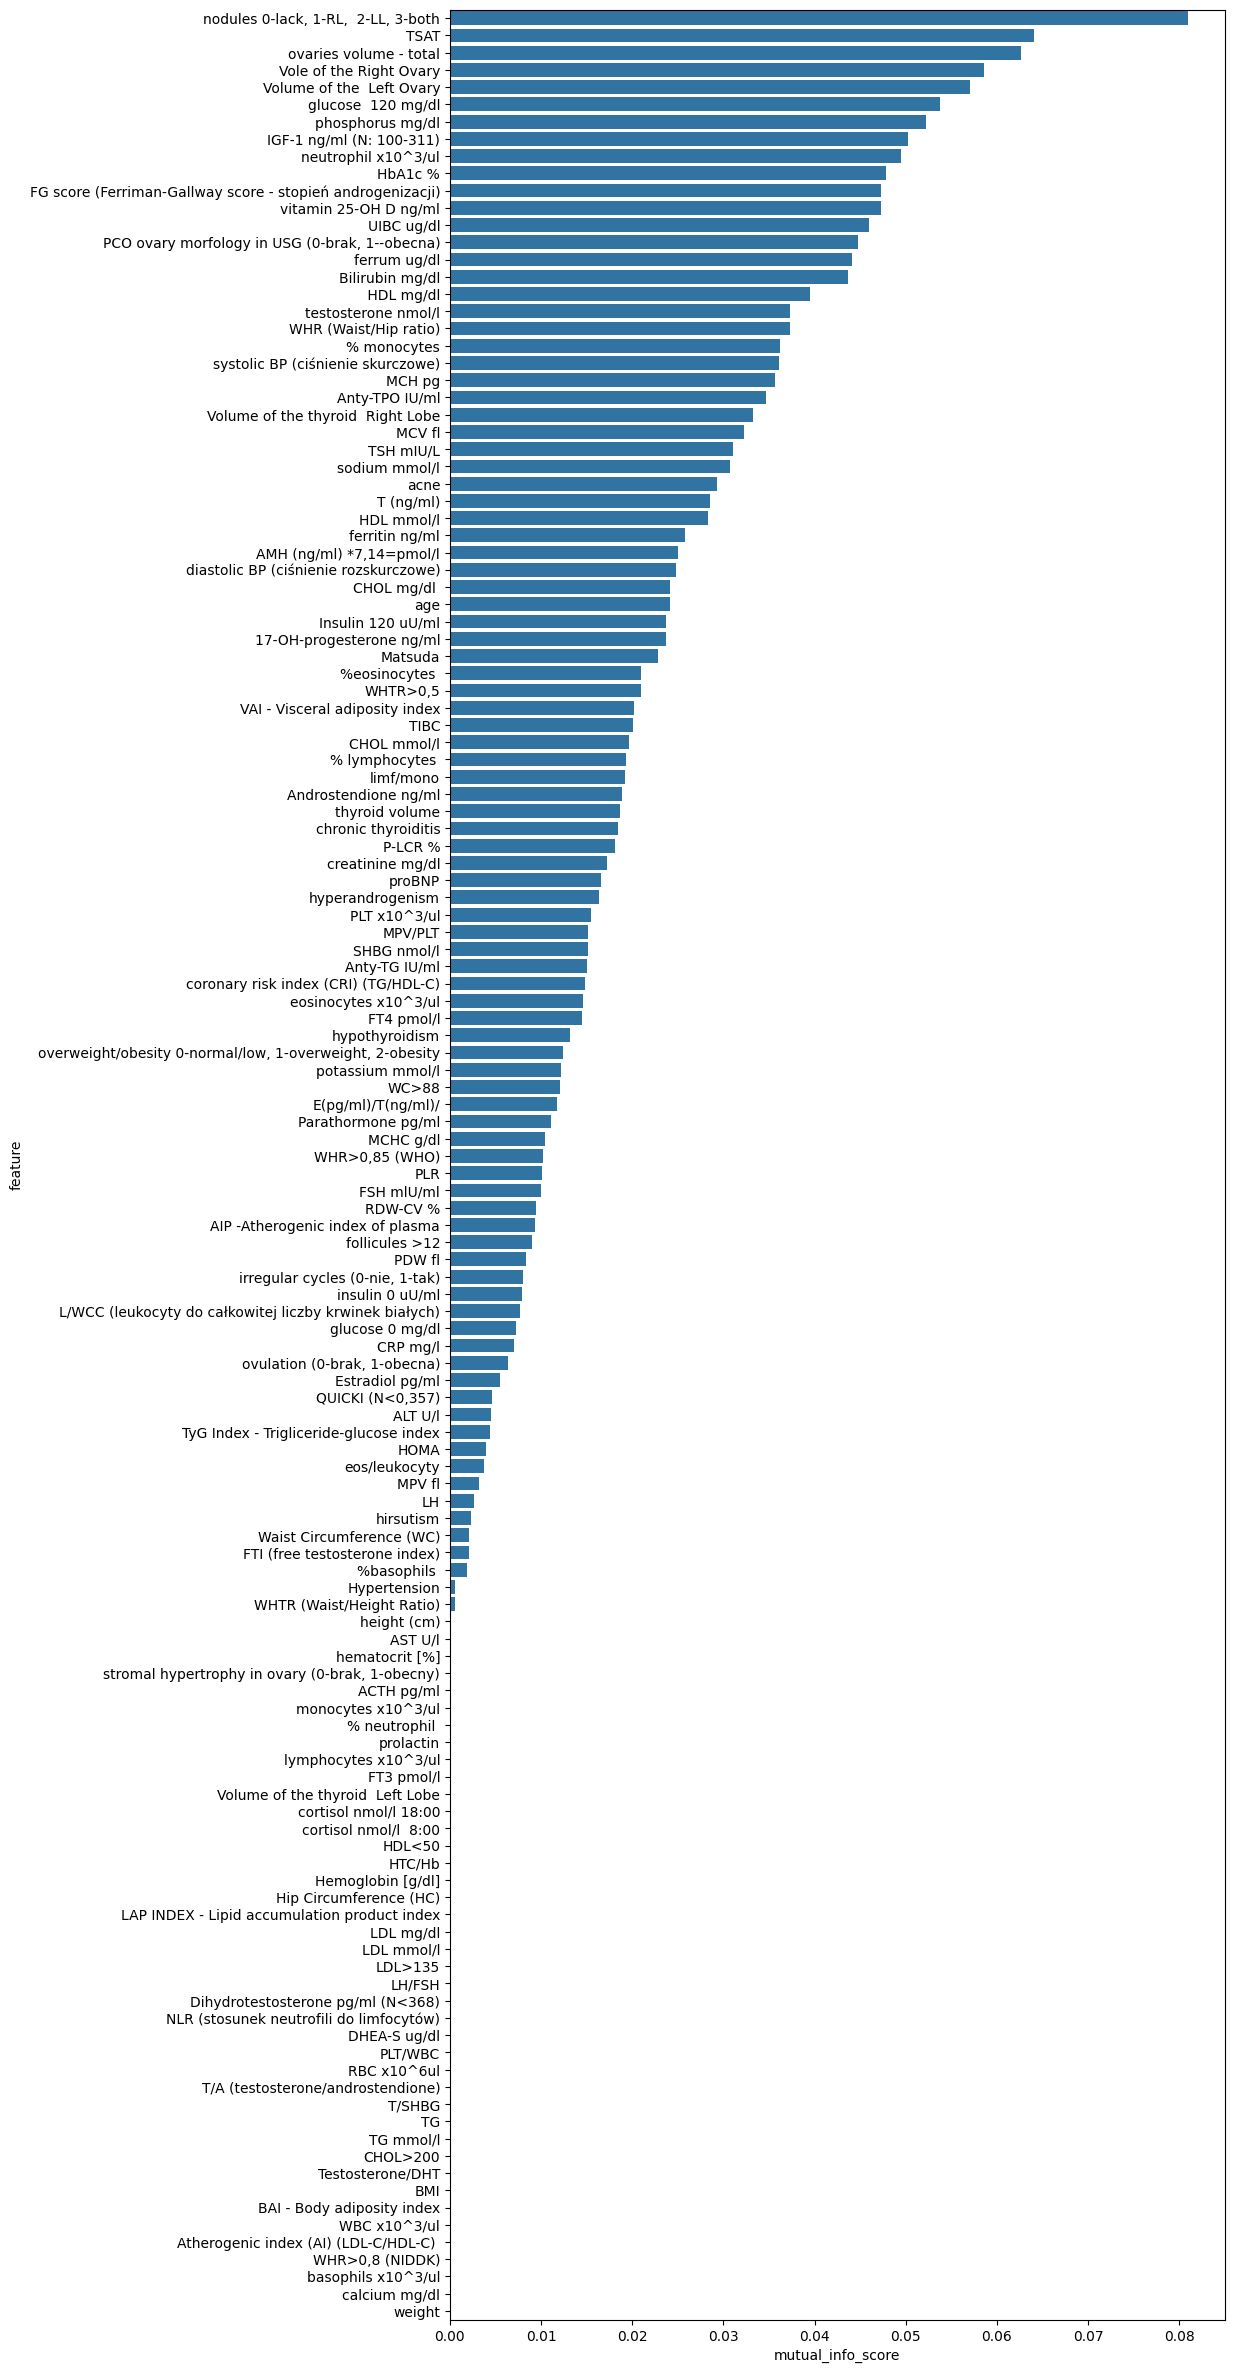

Selected 80 features


In [14]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Optimal number of features: 83


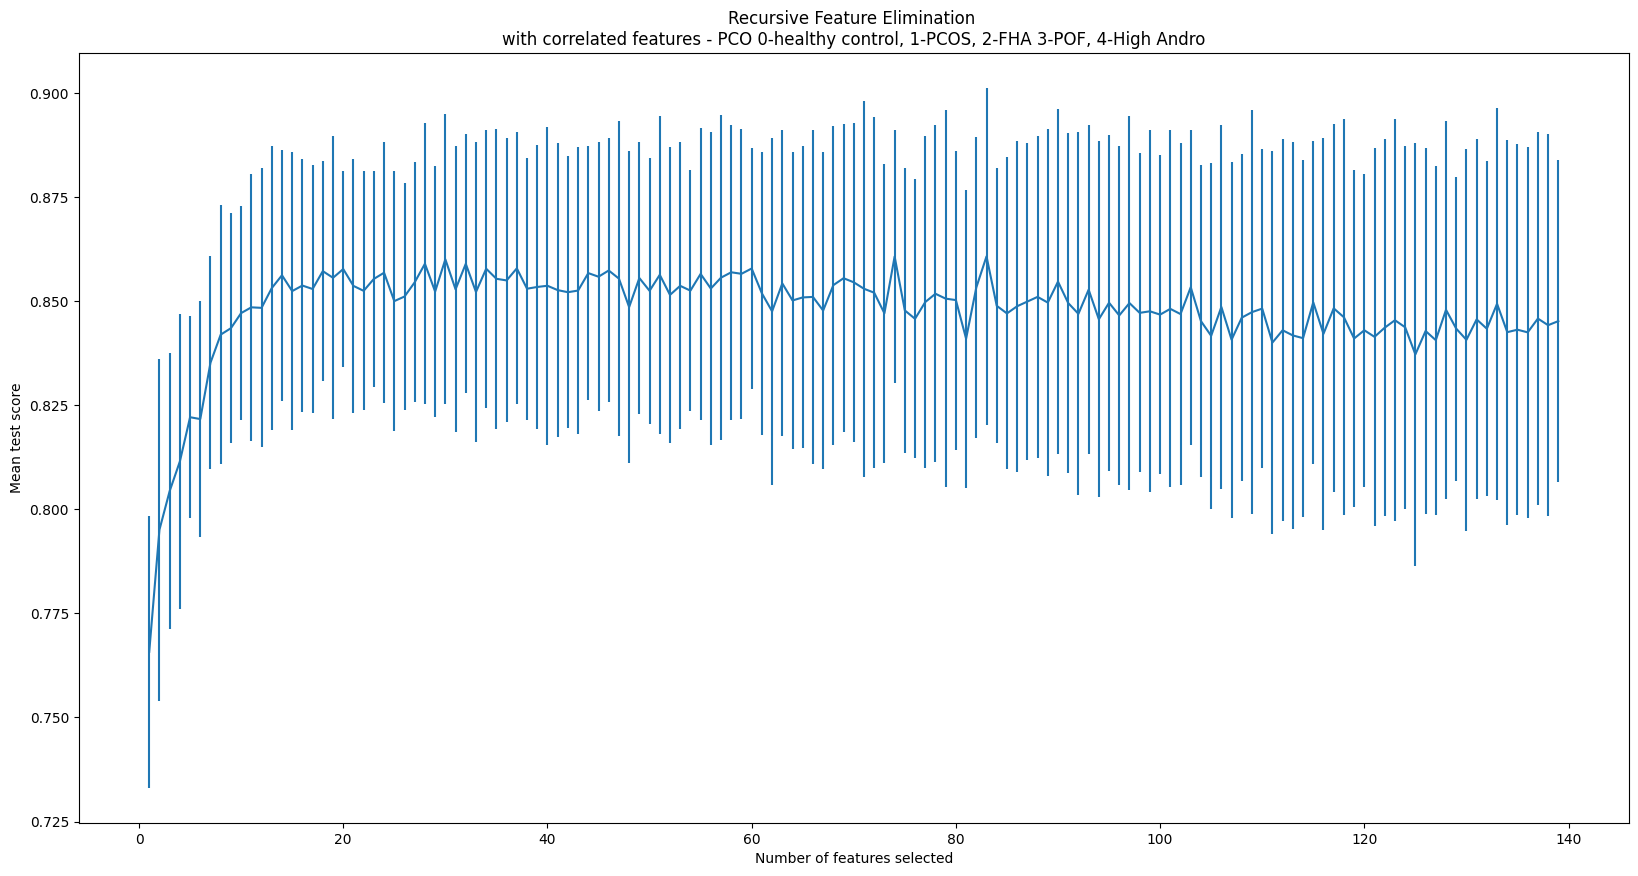

[' HDL mg/dl',
 'WBC x10^3/ul',
 'Volume of the thyroid  Right Lobe',
 'Volume of the thyroid  Left Lobe',
 'Volume of the  Left Ovary',
 'Vole of the Right Ovary',
 'VAI - Visceral adiposity index',
 'UIBC ug/dl',
 'TyG Index - Trigliceride-glucose index',
 'Testosterone/DHT',
 'TSH mIU/L',
 'TSAT',
 'TIBC',
 'TG',
 'T/A (testosterone/androstendione)',
 'T (ng/ml)',
 'vitamin 25-OH D ng/ml',
 'RBC x10^6ul',
 'QUICKI (N<0,357)',
 'Parathormone pg/ml',
 'PLT x10^3/ul',
 'PLR',
 'PDW fl',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'WHR (Waist/Hip ratio)',
 'WHR>0,85 (WHO)',
 'WHTR (Waist/Height Ratio)',
 'age',
 'thyroid volume',
 'systolic BP (ciśnienie skurczowe)',
 'sodium mmol/l',
 'prolactin',
 'proBNP',
 'potassium mmol/l',
 'phosphorus mg/dl',
 'ovaries volume - total',
 'neutrophil x10^3/ul',
 'monocytes x10^3/ul',
 'limf/mono',
 'P-LCR %',
 'insulin 0 uU/ml',
 'glucose  120 mg/dl',
 'follicules >12',
 'ferrum ug/dl',
 'ferritin ng/ml',
 'eos/leukocyty',
 'diastolic BP (

In [38]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

Selected 132 features


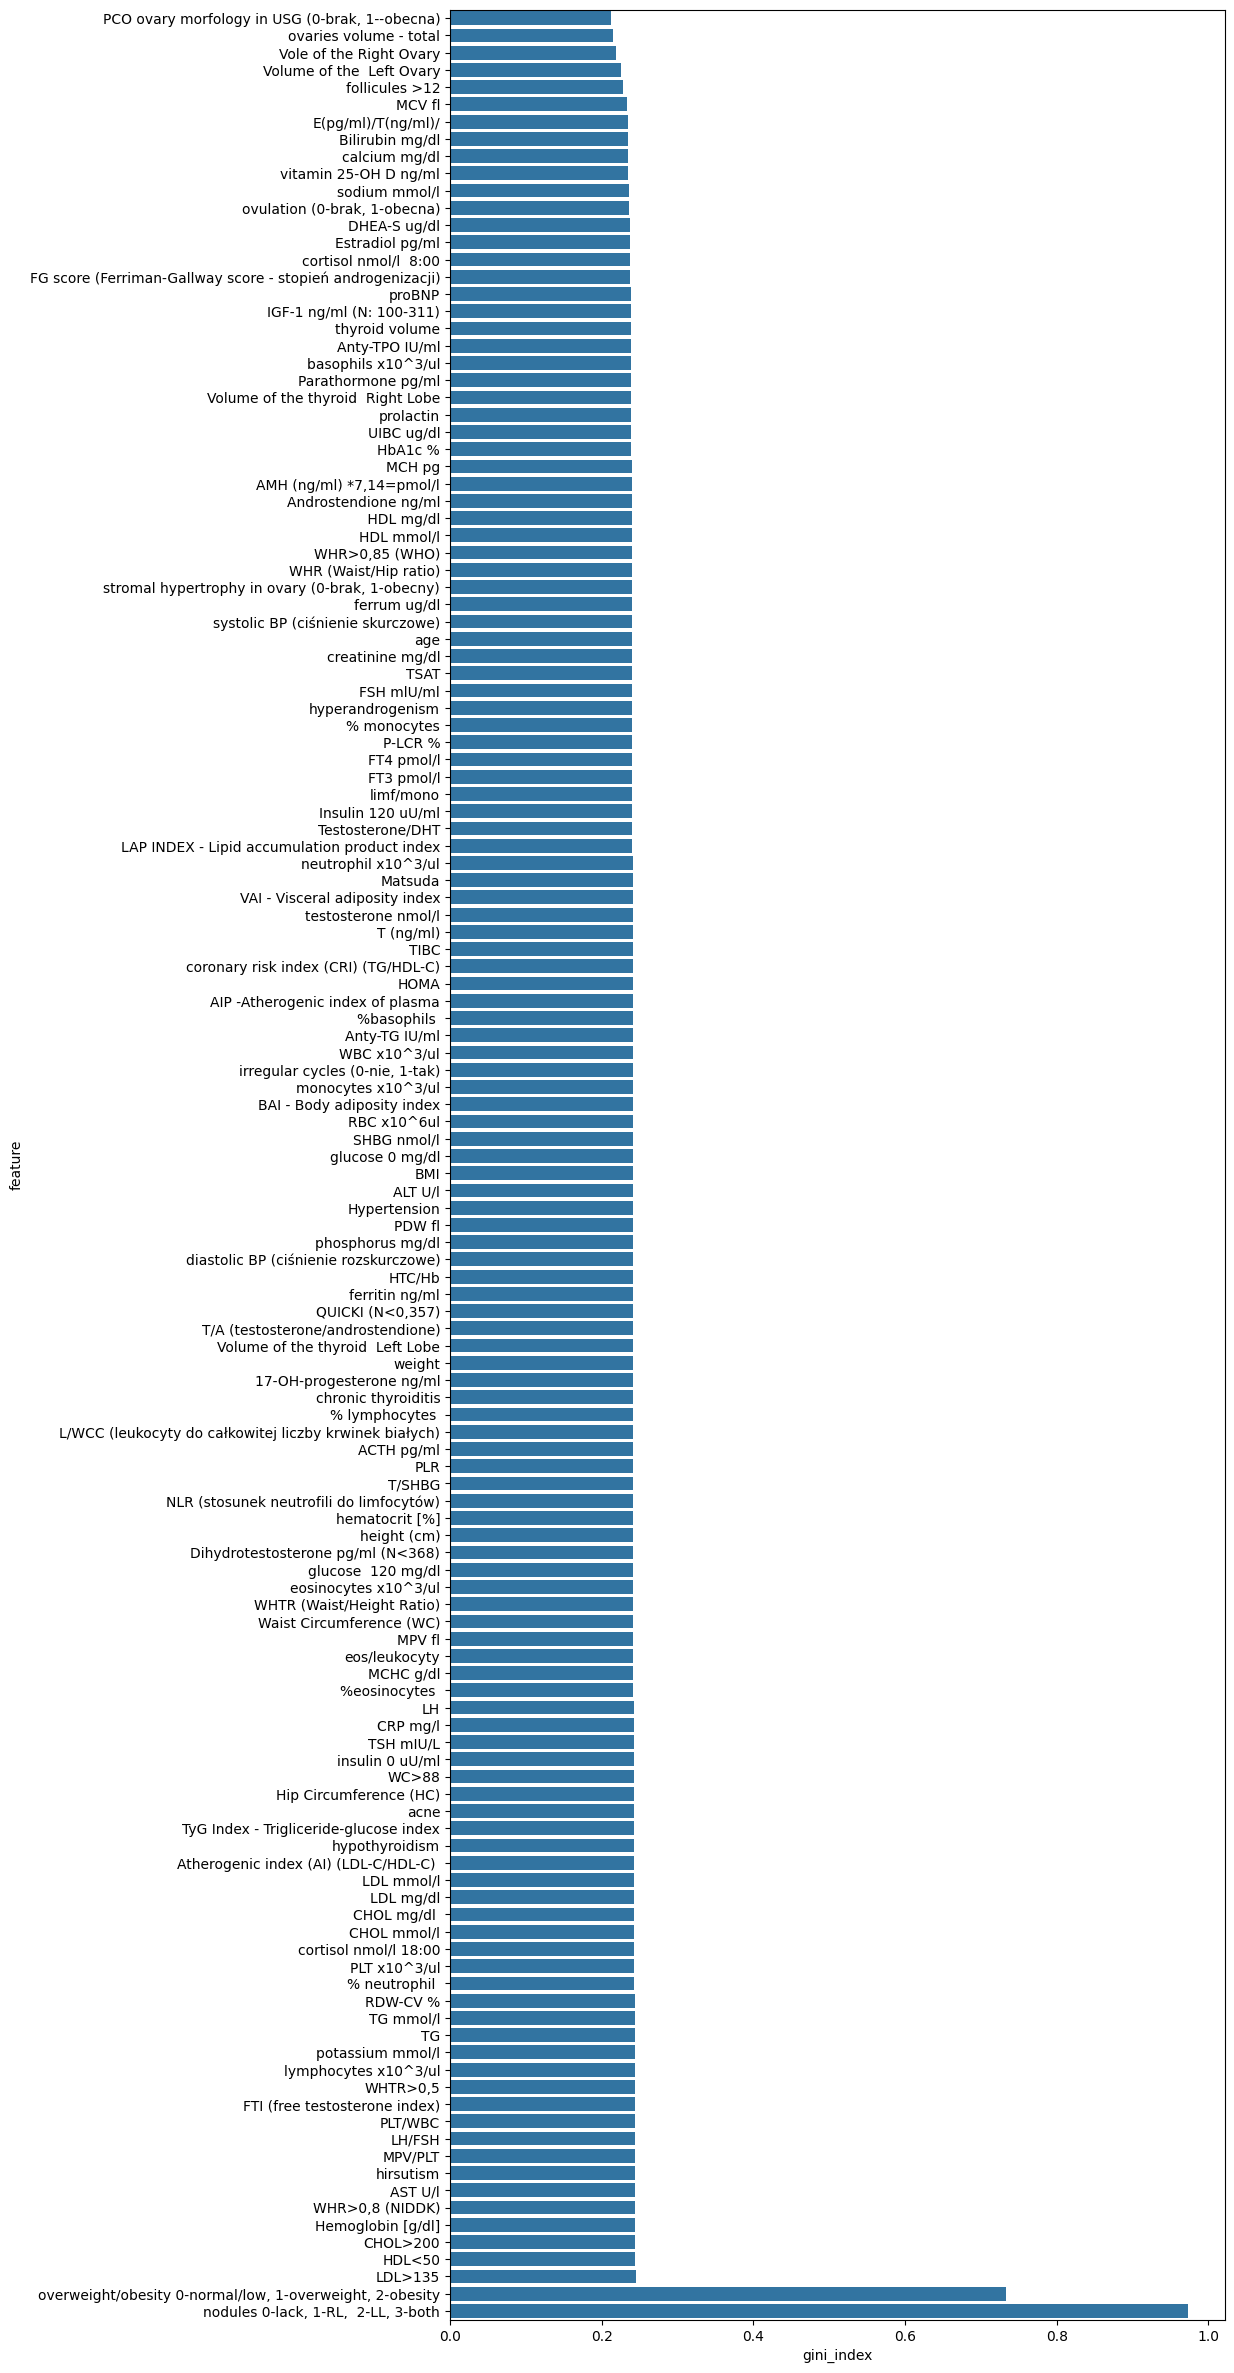

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'ovaries volume - total',
 'Vole of the Right Ovary',
 'Volume of the  Left Ovary',
 'follicules >12',
 'MCV fl',
 'E(pg/ml)/T(ng/ml)/',
 'Bilirubin mg/dl',
 'calcium mg/dl',
 'vitamin 25-OH D ng/ml',
 'sodium mmol/l',
 'ovulation (0-brak, 1-obecna)',
 'DHEA-S ug/dl',
 'Estradiol pg/ml',
 'cortisol nmol/l  8:00',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'proBNP',
 'IGF-1 ng/ml (N: 100-311)',
 'thyroid volume',
 'Anty-TPO IU/ml',
 'basophils x10^3/ul',
 'Parathormone pg/ml',
 'Volume of the thyroid  Right Lobe',
 'prolactin',
 'UIBC ug/dl',
 'HbA1c %',
 'MCH pg',
 'AMH (ng/ml) *7,14=pmol/l',
 'Androstendione ng/ml',
 ' HDL mg/dl',
 'HDL mmol/l',
 'WHR>0,85 (WHO)',
 'WHR (Waist/Hip ratio)',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'ferrum ug/dl',
 'systolic BP (ciśnienie skurczowe)',
 'age',
 'creatinine mg/dl',
 'TSAT',
 'FSH mlU/ml',
 'hyperandrogenism',
 '% monocytes',
 'P-LCR %',
 'FT4 pmol/l',
 'F

In [19]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

# selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

selected 134 features


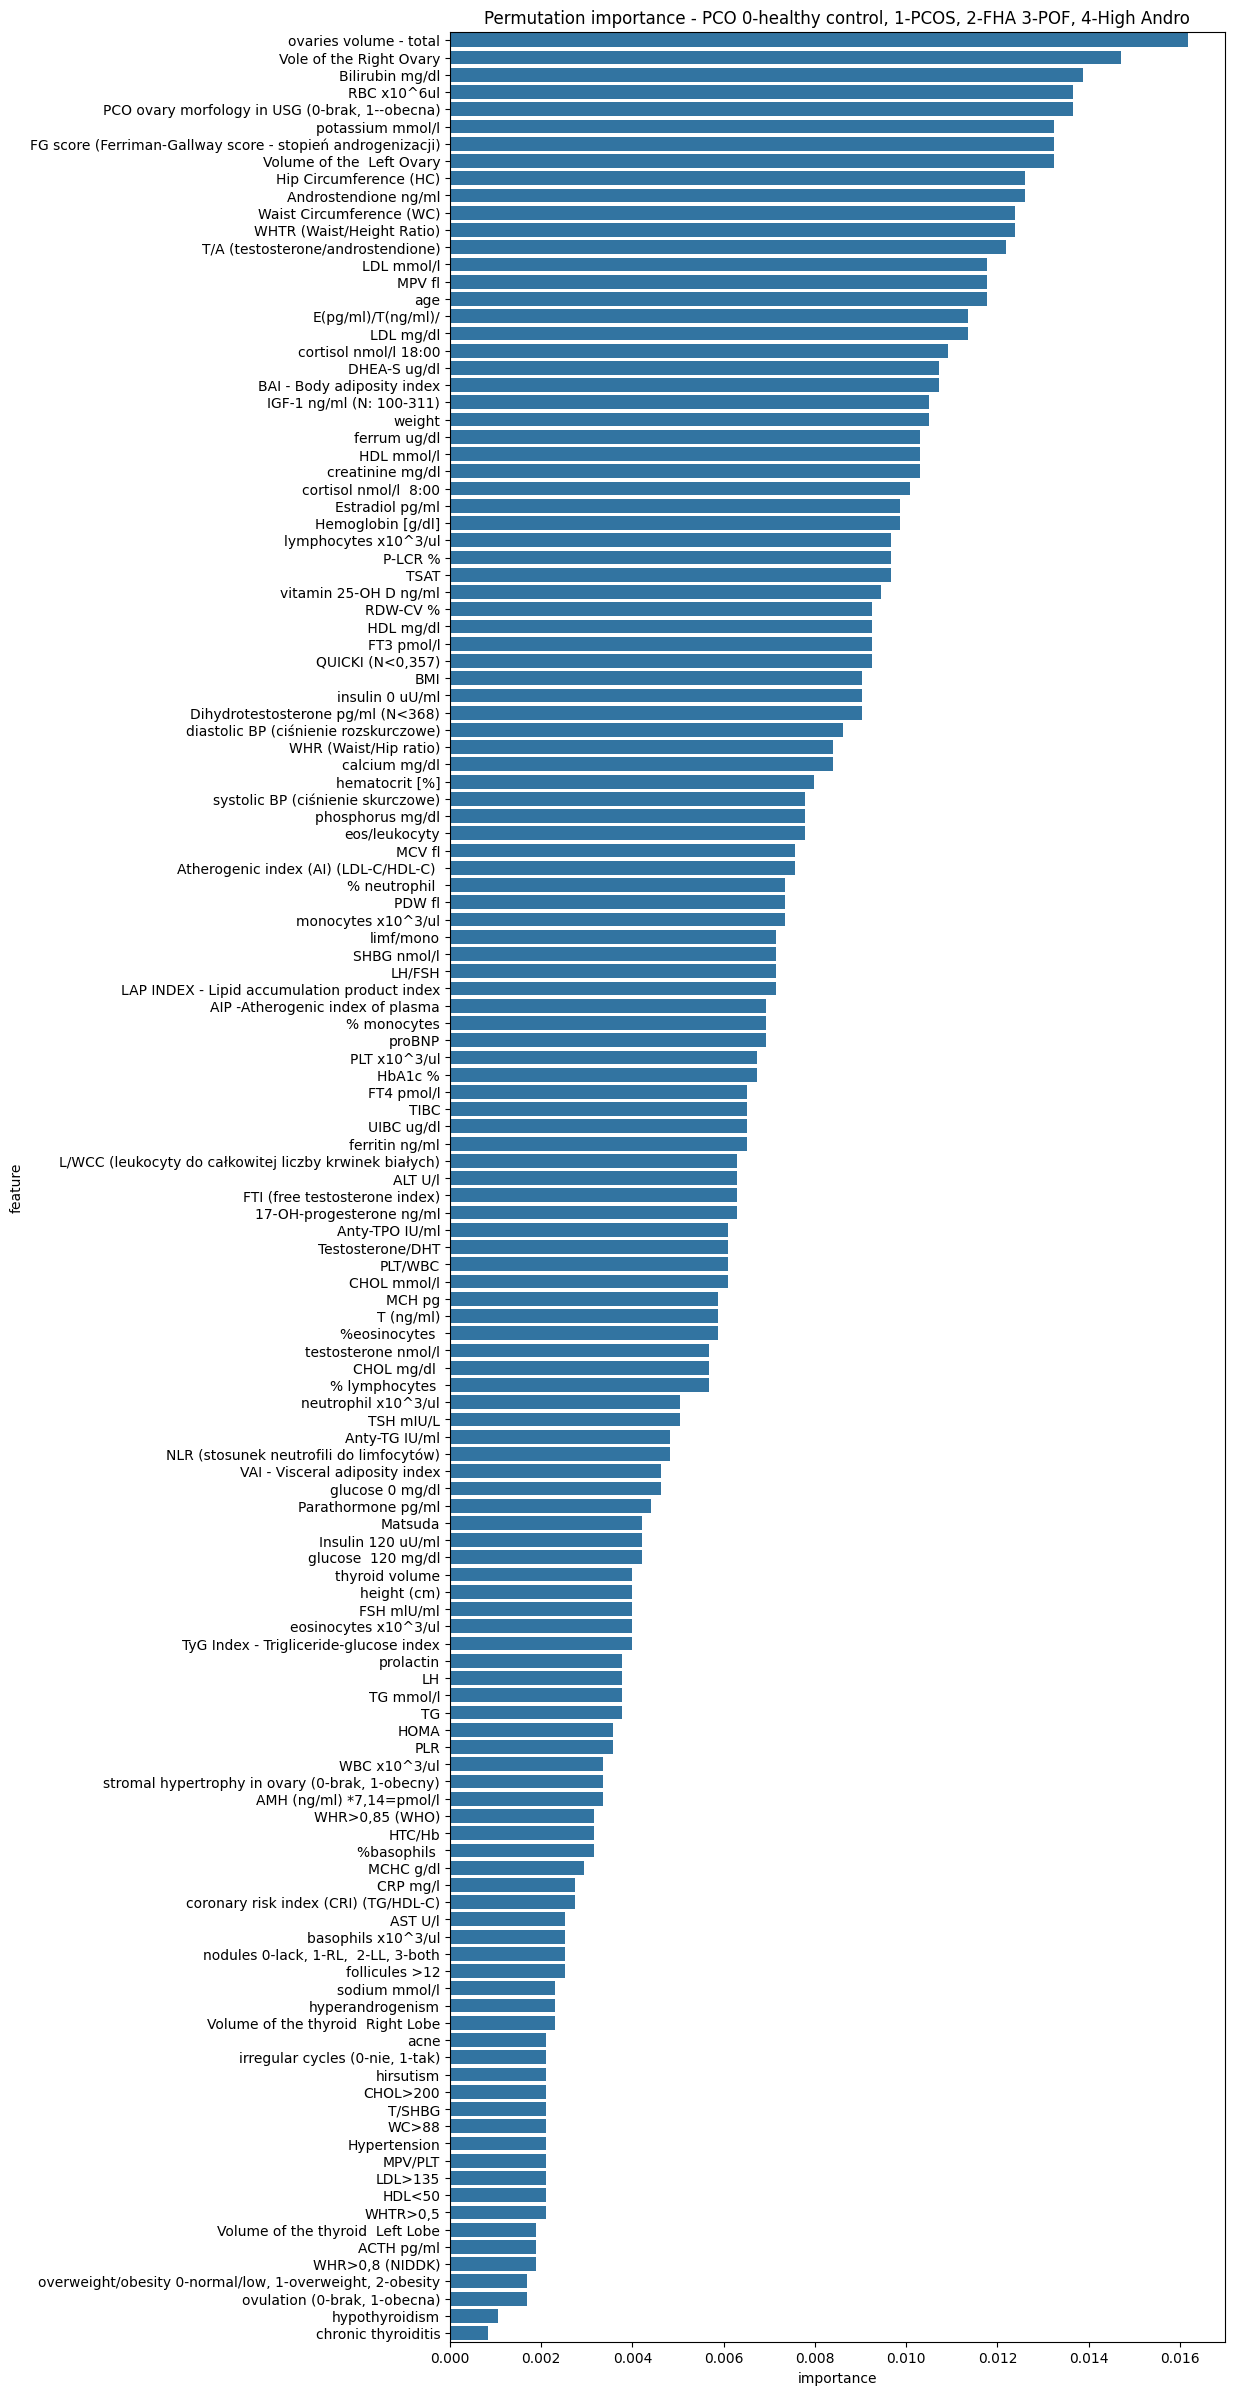

Actually selected 134 features


In [23]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [80]:
selected_features_map

{'chi_2': ['PCO ovary morfology in USG (0-brak, 1--obecna)',
  'ovulation (0-brak, 1-obecna)',
  'follicules >12',
  'Hypertension',
  'stromal hypertrophy in ovary (0-brak, 1-obecny)',
  'chronic thyroiditis',
  'WC>88',
  'ovaries volume - total',
  'hypothyroidism',
  'WHR>0,85 (WHO)',
  'Vole of the Right Ovary',
  'acne',
  'Volume of the  Left Ovary',
  'WHTR>0,5',
  'Estradiol pg/ml',
  'hyperandrogenism',
  'CHOL>200',
  'E(pg/ml)/T(ng/ml)/',
  'DHEA-S ug/dl',
  'hirsutism',
  'irregular cycles (0-nie, 1-tak)',
  'Androstendione ng/ml',
  'HDL<50',
  'vitamin 25-OH D ng/ml',
  'Anty-TG IU/ml',
  'prolactin',
  'T/SHBG',
  'P-LCR %'],
 'mutual_info': ['nodules 0-lack, 1-RL,  2-LL, 3-both',
  'TSAT',
  'ovaries volume - total',
  'Vole of the Right Ovary',
  'Volume of the  Left Ovary',
  'glucose  120 mg/dl',
  'phosphorus mg/dl',
  'IGF-1 ng/ml (N: 100-311)',
  'neutrophil x10^3/ul',
  'HbA1c %',
  'FG score (Ferriman-Gallway score - stopień androgenizacji)',
  'vitamin 25-OH D

In [25]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

20
['Volume of the  Left Ovary', 'irregular cycles (0-nie, 1-tak)', 'WHR>0,85 (WHO)', 'chronic thyroiditis', 'WC>88', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'ovulation (0-brak, 1-obecna)', 'ovaries volume - total', 'vitamin 25-OH D ng/ml', 'hypothyroidism', 'Estradiol pg/ml', 'E(pg/ml)/T(ng/ml)/', 'Androstendione ng/ml', 'Vole of the Right Ovary', 'Anty-TG IU/ml', 'follicules >12', 'acne', 'P-LCR %', 'WHTR>0,5', 'hyperandrogenism']


0
0                        Volume of the  Left Ovary
1                  irregular cycles (0-nie, 1-tak)
2                                   WHR>0,85 (WHO)
3                              chronic thyroiditis
4                                            WC>88
5   PCO ovary morfology in USG (0-brak, 1--obecna)
6                     ovulation (0-brak, 1-obecna)
7                           ovaries volume - total
8                            vitamin 25-OH D ng/ml
9                                   hypothyroidism
10                                 Estradiol pg/ml
11                              E(pg/ml)/T(ng/ml)/
12                            Androstendione ng/ml
13                         Vole of the Right Ovary
14                                   Anty-TG IU/ml
15                                  follicules >12
16                                            acne
17                                         P-LCR %
18                                        WHTR>0,5
19                                hyperandrogenism

In [8]:
# intersection_all_sets = ['Volume of the  Left Ovary', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'E(pg/ml)/T(ng/ml)/', 'ovaries volume - total', 'Androstendione ng/ml', 'vitamin 25-OH D ng/ml', 'P-LCR %', 'Vole of the Right Ovary']

In [26]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

134
['HDL mmol/l', 'ferritin ng/ml', 'phosphorus mg/dl', 'cortisol nmol/l  8:00', 'irregular cycles (0-nie, 1-tak)', 'FT4 pmol/l', 'FSH mlU/ml', 'LDL>135', 'Testosterone/DHT', 'LDL mmol/l', 'stromal hypertrophy in ovary (0-brak, 1-obecny)', 'creatinine mg/dl', 'Hip Circumference (HC)', 'vitamin 25-OH D ng/ml', 'age', '%basophils ', 'MCV fl', 'prolactin', 'coronary risk index (CRI) (TG/HDL-C)', 'SHBG nmol/l', 'MPV fl', 'Androstendione ng/ml', 'glucose 0 mg/dl', 'AIP -Atherogenic index of plasma', 'RDW-CV %', 'diastolic BP (ciśnienie rozskurczowe)', 'WHR (Waist/Hip ratio)', 'VAI - Visceral adiposity index', 'T/A (testosterone/androstendione)', 'PLT/WBC', 'Volume of the thyroid  Left Lobe', 'FTI (free testosterone index)', 'PDW fl', 'TG', 'testosterone nmol/l', 'LH/FSH', 'CHOL>200', 'PLR', 'Volume of the  Left Ovary', 'BMI', 'PLT x10^3/ul', 'WHR>0,85 (WHO)', 'WHTR (Waist/Height Ratio)', 'chronic thyroiditis', 'TSAT', 'hematocrit [%]', 'MPV/PLT', 'ALT U/l', 'PCO ovary morfology in USG (0-b

## Test the narrowed down feature space

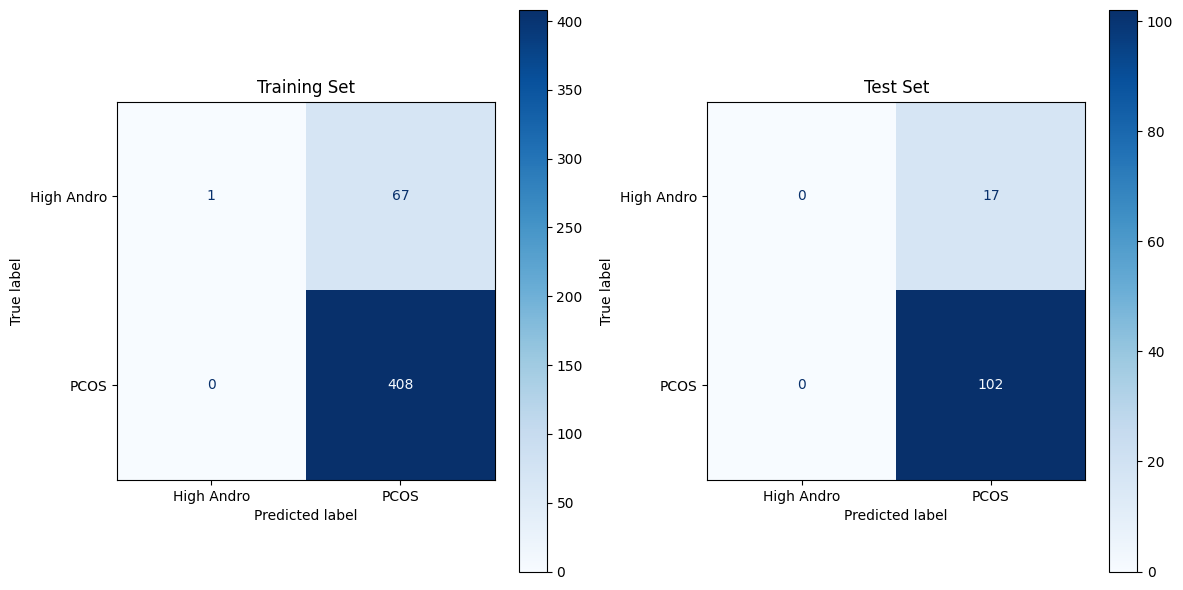

Training set
G-mean: 0.121
              precision    recall  f1-score   support

  High Andro       1.00      0.01      0.03        68
        PCOS       0.86      1.00      0.92       408

    accuracy                           0.86       476
   macro avg       0.93      0.51      0.48       476
weighted avg       0.88      0.86      0.80       476

G-mean: 0.0
Test set
              precision    recall  f1-score   support

  High Andro       0.00      0.00      0.00        17
        PCOS       0.86      1.00      0.92       102

    accuracy                           0.86       119
   macro avg       0.43      0.50      0.46       119
weighted avg       0.73      0.86      0.79       119



c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


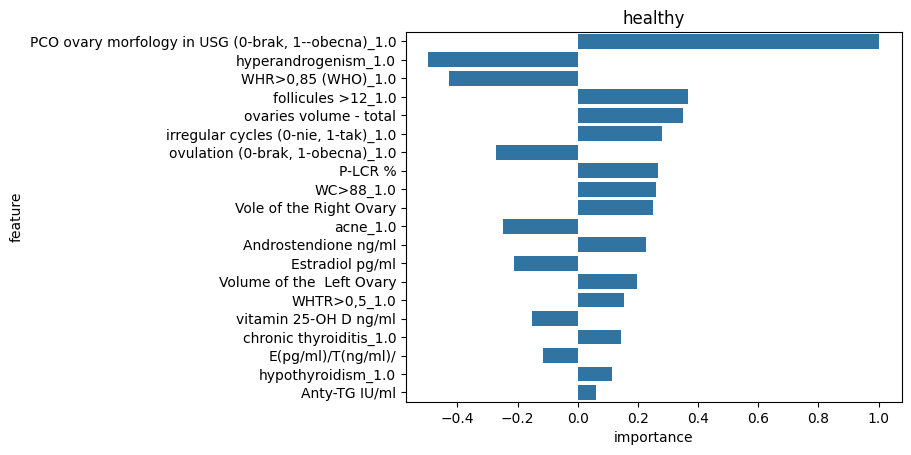

In [27]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

In [29]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [7, 10],
    'model__min_samples_leaf': [7, 10],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_clasification_smote(X_train[intersection_all_sets], y_train, PCO, model_tree, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, param_grid_tree, scoring_metric=gmean_scorer)

# tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.7473674297242037


params  mean_train_score  mean_test_score
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.785348         0.747367
0     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.785366         0.745925
2    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.785348         0.745895
1    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.785366         0.745222
6    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.785229         0.740123
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.785229         0.738314
4     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.795369         0.735592
5    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.796065         0.734833
8     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.810224         0.703474
9    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.811273         0.703414
10   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.794121         0.698724
11  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.792710         0.698722

Best ccp_alpha: 0.0 with CV g-mean: 0.820794178393689
(0.0, 0.820794178393689) (0.00021893814997264033, 0.820794178393689) (0.00022008803521408578, 0.820794178393689) (0.0006105006105006153, 0.820794178393689) (0.0008799429941053222, 0.820794178393689) (0.009703669837921508, 0.7210258478427677) (0.012811094241148596, 0.7789945096908786) (0.013840346420085789, 0.7888073101531219) (0.04919270344833894, 0.4516263046514938)


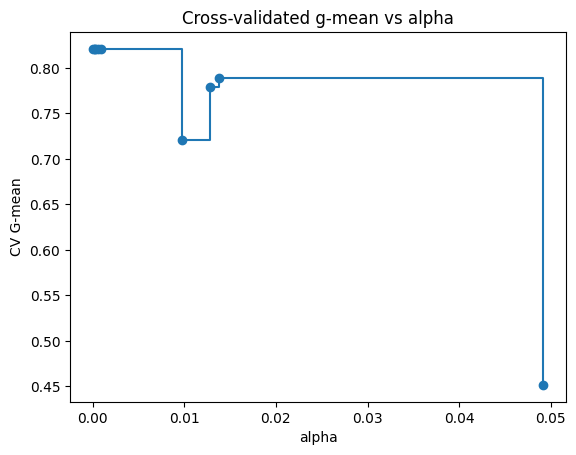

Test set G-mean with best ccp_alpha: 0.8711709761381592


In [85]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight=None)

final_model = prune_tree(model_tree, X_train[intersection_all_sets], y_train)

test_g_mean = geometric_mean_score(y_test, final_model.predict(X_test[intersection_all_sets])) 
print(f"Test set G-mean with best ccp_alpha: {test_g_mean}")

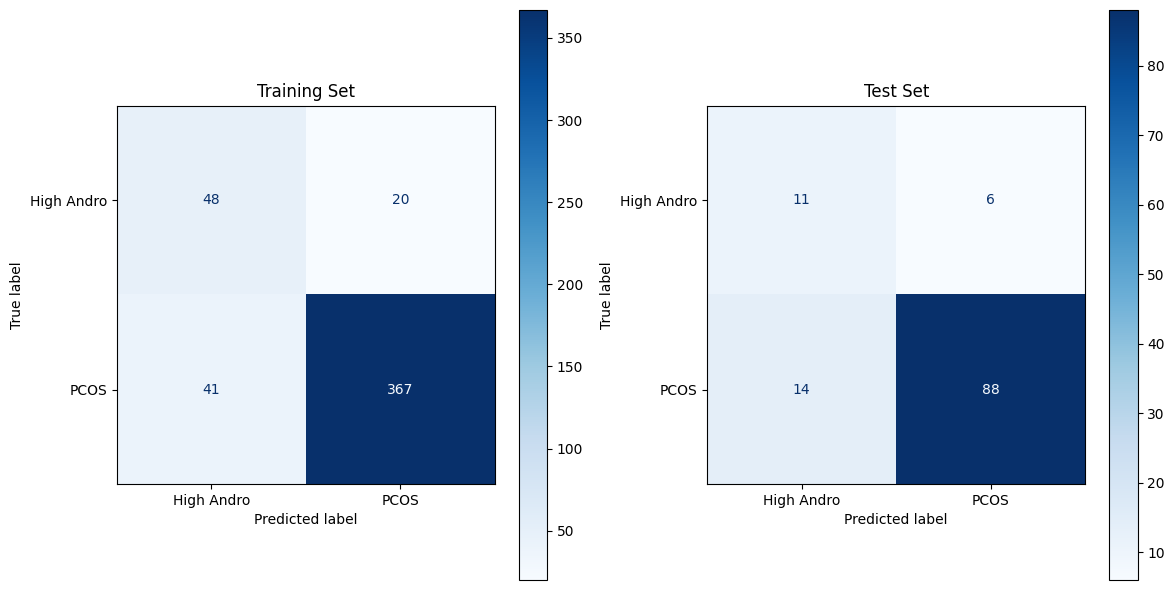

Training set
G-mean: 0.797
              precision    recall  f1-score   support

  High Andro       0.54      0.71      0.61        68
        PCOS       0.95      0.90      0.92       408

    accuracy                           0.87       476
   macro avg       0.74      0.80      0.77       476
weighted avg       0.89      0.87      0.88       476

G-mean: 0.747
Test set
              precision    recall  f1-score   support

  High Andro       0.44      0.65      0.52        17
        PCOS       0.94      0.86      0.90       102

    accuracy                           0.83       119
   macro avg       0.69      0.75      0.71       119
weighted avg       0.87      0.83      0.84       119



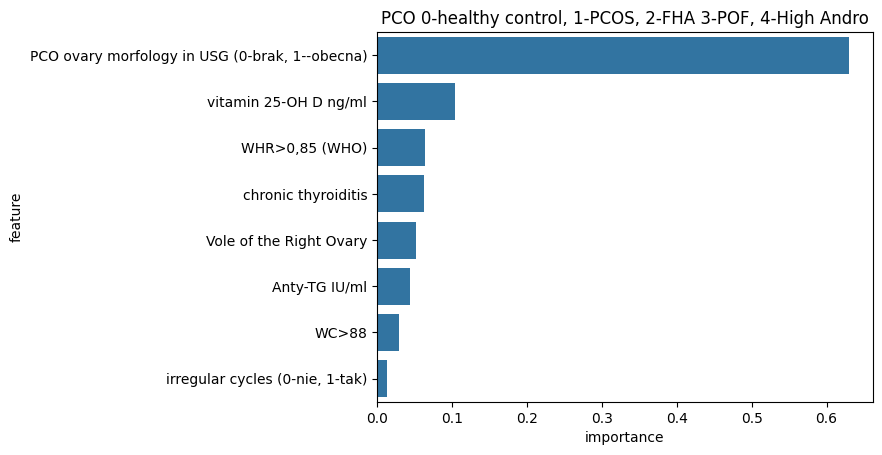

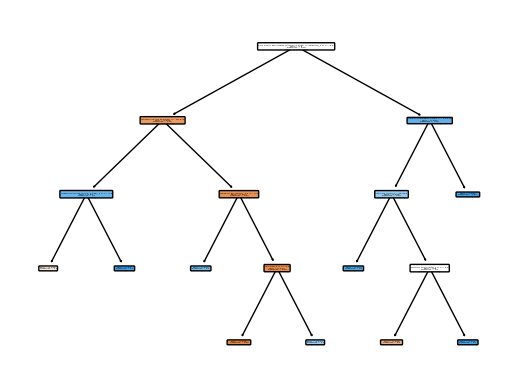

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


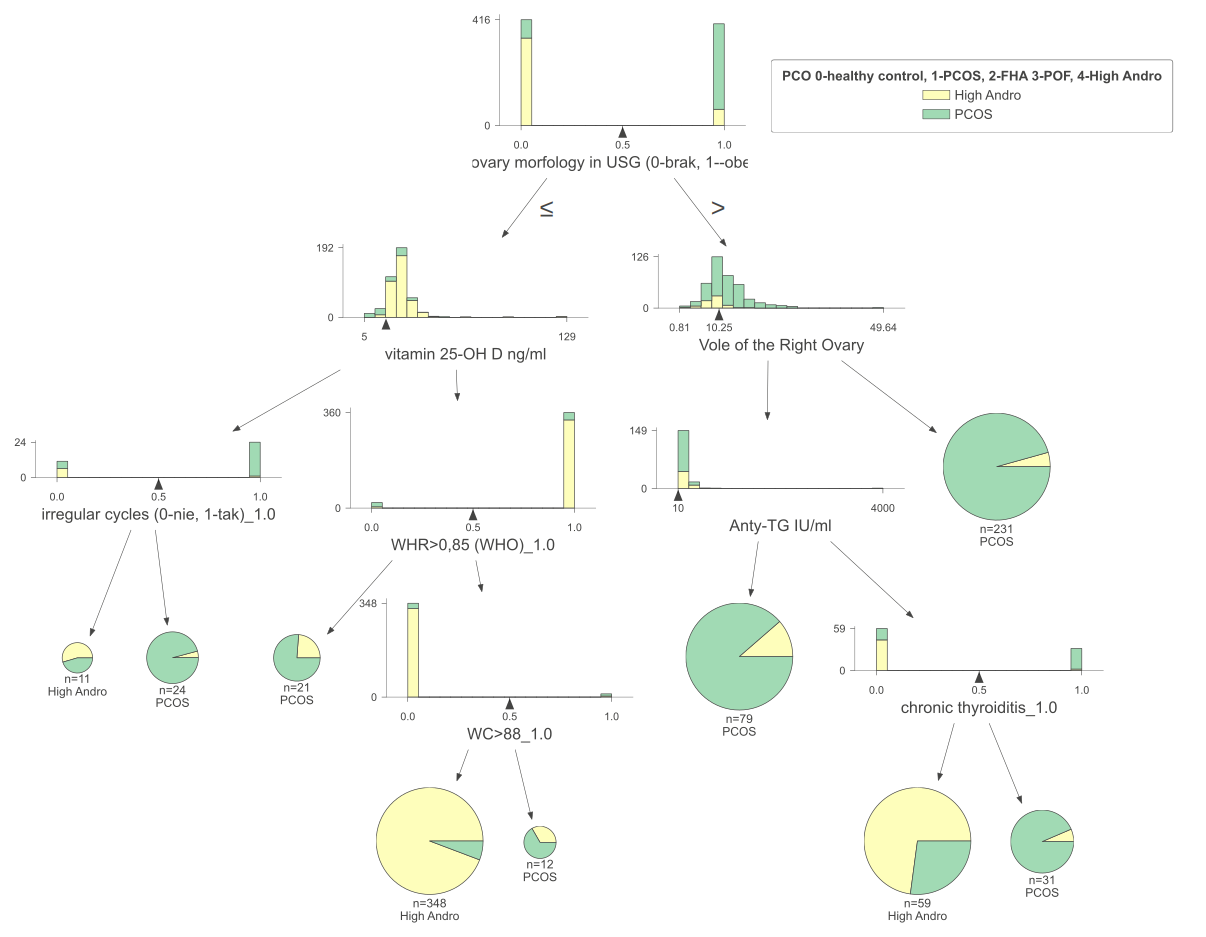

In [91]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, min_samples_split=10, class_weight=None, ccp_alpha=0.00369519)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


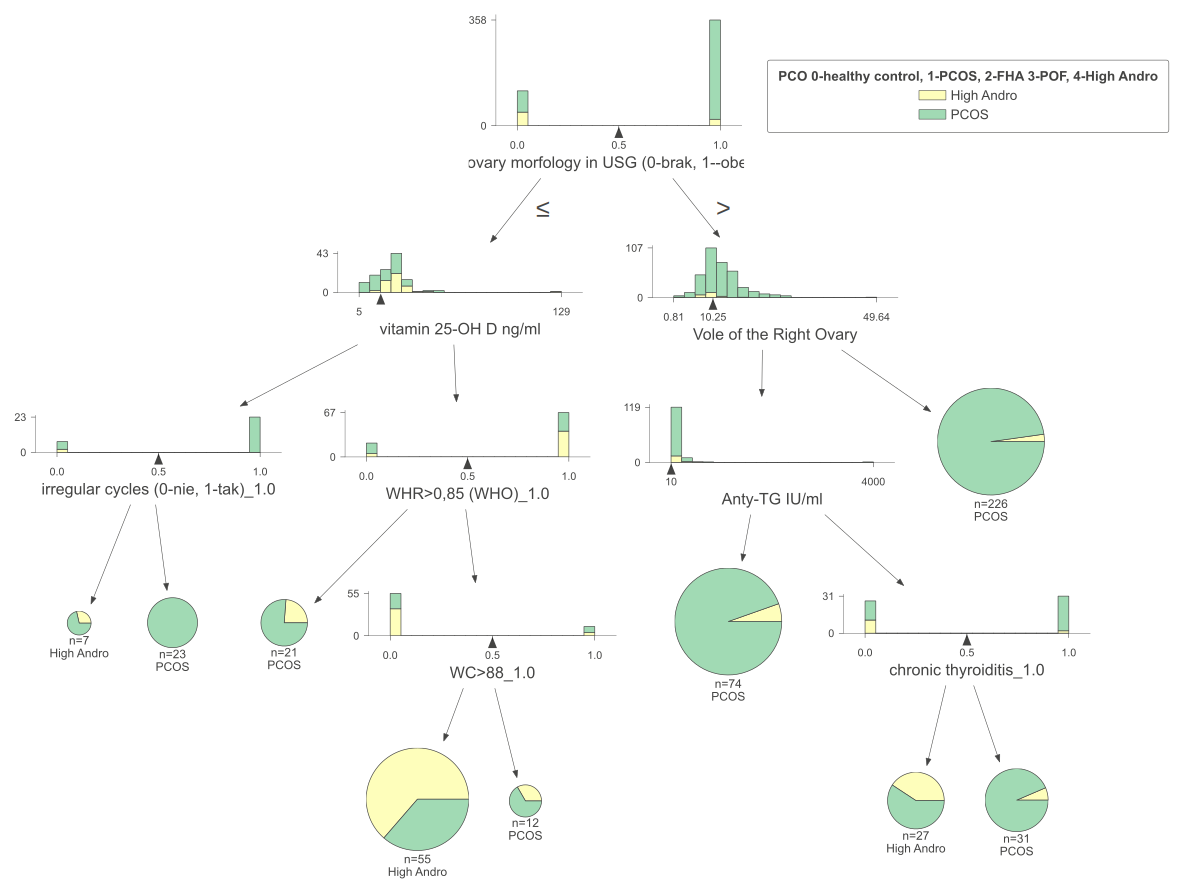

In [92]:
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


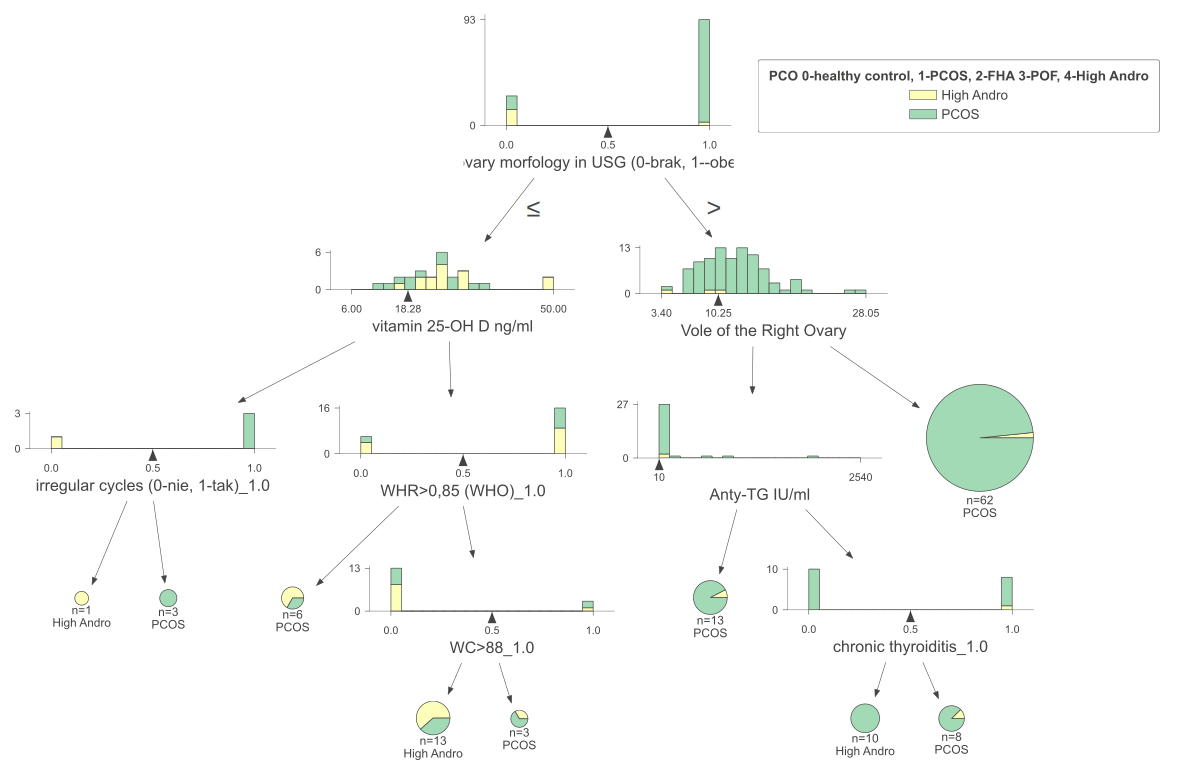

In [93]:
plot_fancy_tree_smote(pipeline_tree, X_test, y_test, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

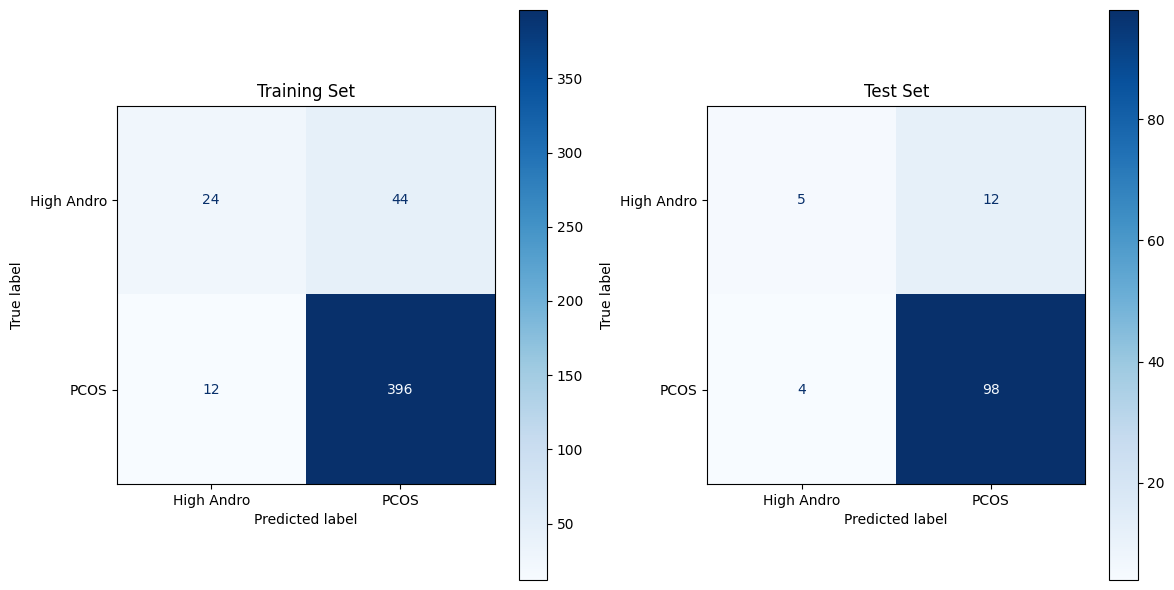

Training set
G-mean: 0.585
              precision    recall  f1-score   support

  High Andro       0.67      0.35      0.46        68
        PCOS       0.90      0.97      0.93       408

    accuracy                           0.88       476
   macro avg       0.78      0.66      0.70       476
weighted avg       0.87      0.88      0.87       476

G-mean: 0.532
Test set
              precision    recall  f1-score   support

  High Andro       0.56      0.29      0.38        17
        PCOS       0.89      0.96      0.92       102

    accuracy                           0.87       119
   macro avg       0.72      0.63      0.65       119
weighted avg       0.84      0.87      0.85       119



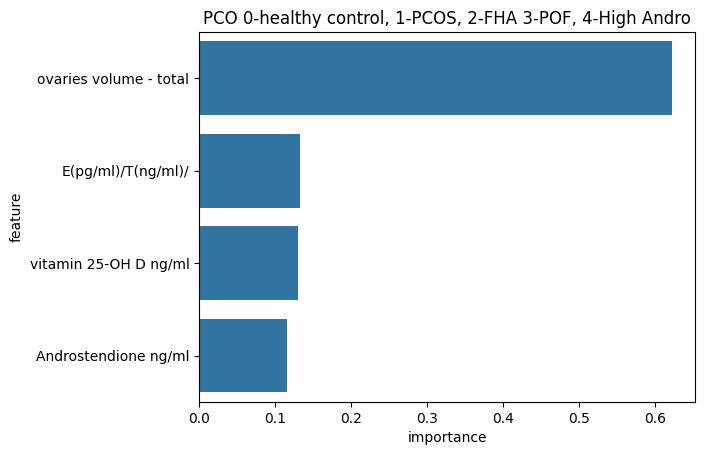

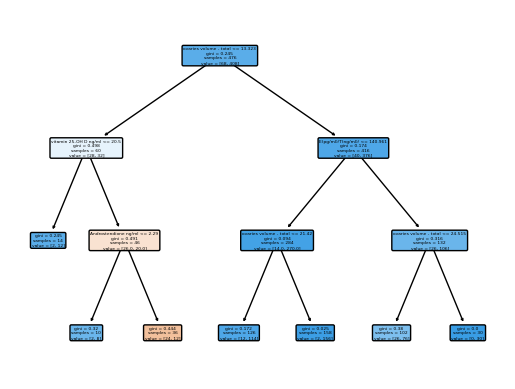

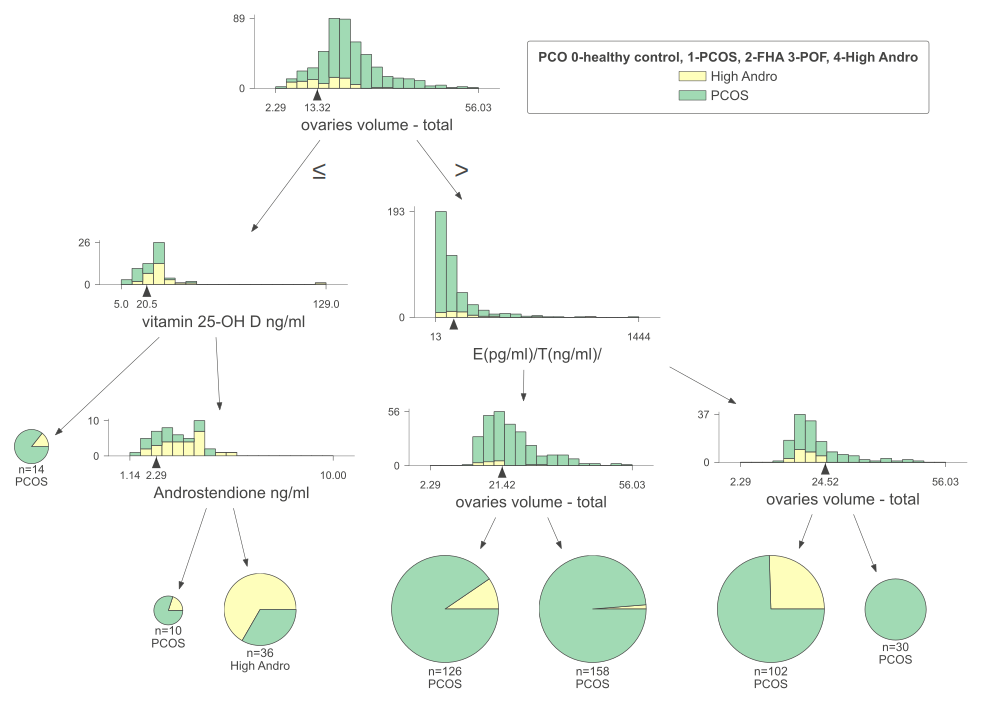

In [20]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=10, min_samples_split=10, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)


plot_fancy_tree(pipeline_tree, X_train[intersection_all_sets], y_train, PCO, CLASS_NAMES)

In [41]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

ValueError: Pandas output does not support sparse data. Set sparse_output=False to output pandas dataframes or disable Pandas output via` ohe.set_output(transform="default").